In [1]:
# import needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from matplotlib.colors import BoundaryNorm, ListedColormap

In [2]:
stores = pd.read_csv('./stores.csv')

In [3]:
stores.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [4]:
stores.cluster.value_counts()

3     7
6     6
10    6
15    5
13    4
14    4
11    3
4     3
8     3
1     3
9     2
7     2
2     2
12    1
5     1
16    1
17    1
Name: cluster, dtype: int64

In [5]:
stores.city.value_counts()

Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Manta             2
Latacunga         2
Machala           2
Ambato            2
Quevedo           1
Esmeraldas        1
Loja              1
Libertad          1
Playas            1
Daule             1
Babahoyo          1
Salinas           1
Puyo              1
Guaranda          1
Ibarra            1
Riobamba          1
Cayambe           1
El Carmen         1
Name: city, dtype: int64

In [6]:
stores.type.value_counts()

D    18
C    15
A     9
B     8
E     4
Name: type, dtype: int64

In [7]:
stores.state.value_counts()

Pichincha                         19
Guayas                            11
Santo Domingo de los Tsachilas     3
Azuay                              3
Manabi                             3
Cotopaxi                           2
Tungurahua                         2
Los Rios                           2
El Oro                             2
Chimborazo                         1
Imbabura                           1
Bolivar                            1
Pastaza                            1
Santa Elena                        1
Loja                               1
Esmeraldas                         1
Name: state, dtype: int64

In [8]:
holidays = pd.read_csv('./holidays_events.csv')

In [9]:
holidays.head()

date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

In [10]:
transactions = pd.read_csv('./transactions.csv')

In [11]:
transactions.head()

date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922

In [12]:
transactions.store_nbr.value_counts()

39    1678
38    1678
26    1678
31    1678
33    1678
34    1678
37    1678
27    1677
28    1677
32    1677
23    1677
40    1677
41    1677
44    1677
45    1677
46    1677
47    1677
48    1677
50    1677
51    1677
49    1677
2     1677
16    1677
5     1677
54    1676
3     1676
4     1676
6     1676
8     1676
9     1676
19    1676
35    1676
13    1676
1     1676
15    1676
11    1676
10    1675
7     1675
17    1674
43    1672
30    1655
14    1638
12    1616
25    1615
24    1577
18    1566
36    1551
53    1167
20     909
29     874
21     748
42     720
22     671
52     118
Name: store_nbr, dtype: int64

In [13]:
oil = pd.read_csv('./oil.csv')

In [14]:
oil.head()

date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20

In [15]:
oil.describe()

dcoilwtico
count  1175.000000
mean     67.714366
std      25.630476
min      26.190000
25%      46.405000
50%      53.190000
75%      95.660000
max     110.620000

In [16]:
train_csv = pd.read_csv('./train.csv')

In [17]:
train_csv.head()

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

In [18]:
len(train_csv)

3000888

In [19]:
train_csv.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

In [20]:
train_csv["date"] = pd.to_datetime(train_csv["date"])

In [21]:
train_csv.dtypes

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
dtype: object

In [22]:
train_df = train_csv.set_index('date')

In [23]:
train_df.family.value_counts()

AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION                 

In [24]:
family_values = train_df.family.unique()

In [25]:
family_df = []

In [26]:
for i in family_values:
    family_df.append(train_df[train_df.family == i])

In [27]:
for j in family_df:
    pass

In [28]:
family_df[0].head()

id  store_nbr      family  sales  onpromotion
date                                                      
2013-01-01    0          1  AUTOMOTIVE    0.0            0
2013-01-01   33         10  AUTOMOTIVE    0.0            0
2013-01-01   66         11  AUTOMOTIVE    0.0            0
2013-01-01   99         12  AUTOMOTIVE    0.0            0
2013-01-01  132         13  AUTOMOTIVE    0.0            0

In [29]:
train_df[train_df.family == "AUTOMOTIVE"]

id  store_nbr      family  sales  onpromotion
date                                                          
2013-01-01        0          1  AUTOMOTIVE    0.0            0
2013-01-01       33         10  AUTOMOTIVE    0.0            0
2013-01-01       66         11  AUTOMOTIVE    0.0            0
2013-01-01       99         12  AUTOMOTIVE    0.0            0
2013-01-01      132         13  AUTOMOTIVE    0.0            0
...             ...        ...         ...    ...          ...
2017-08-15  3000723         54  AUTOMOTIVE    8.0            0
2017-08-15  3000756          6  AUTOMOTIVE    7.0            0
2017-08-15  3000789          7  AUTOMOTIVE    5.0            0
2017-08-15  3000822          8  AUTOMOTIVE    4.0            0
2017-08-15  3000855          9  AUTOMOTIVE   15.0            0

[90936 rows x 5 columns]

In [30]:
family_df[1].head()

id  store_nbr     family  sales  onpromotion
date                                                     
2013-01-01    1          1  BABY CARE    0.0            0
2013-01-01   34         10  BABY CARE    0.0            0
2013-01-01   67         11  BABY CARE    0.0            0
2013-01-01  100         12  BABY CARE    0.0            0
2013-01-01  133         13  BABY CARE    0.0            0

In [31]:
store_id = family_df[0].store_nbr.unique()

In [32]:
store_id

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9], dtype=int64)

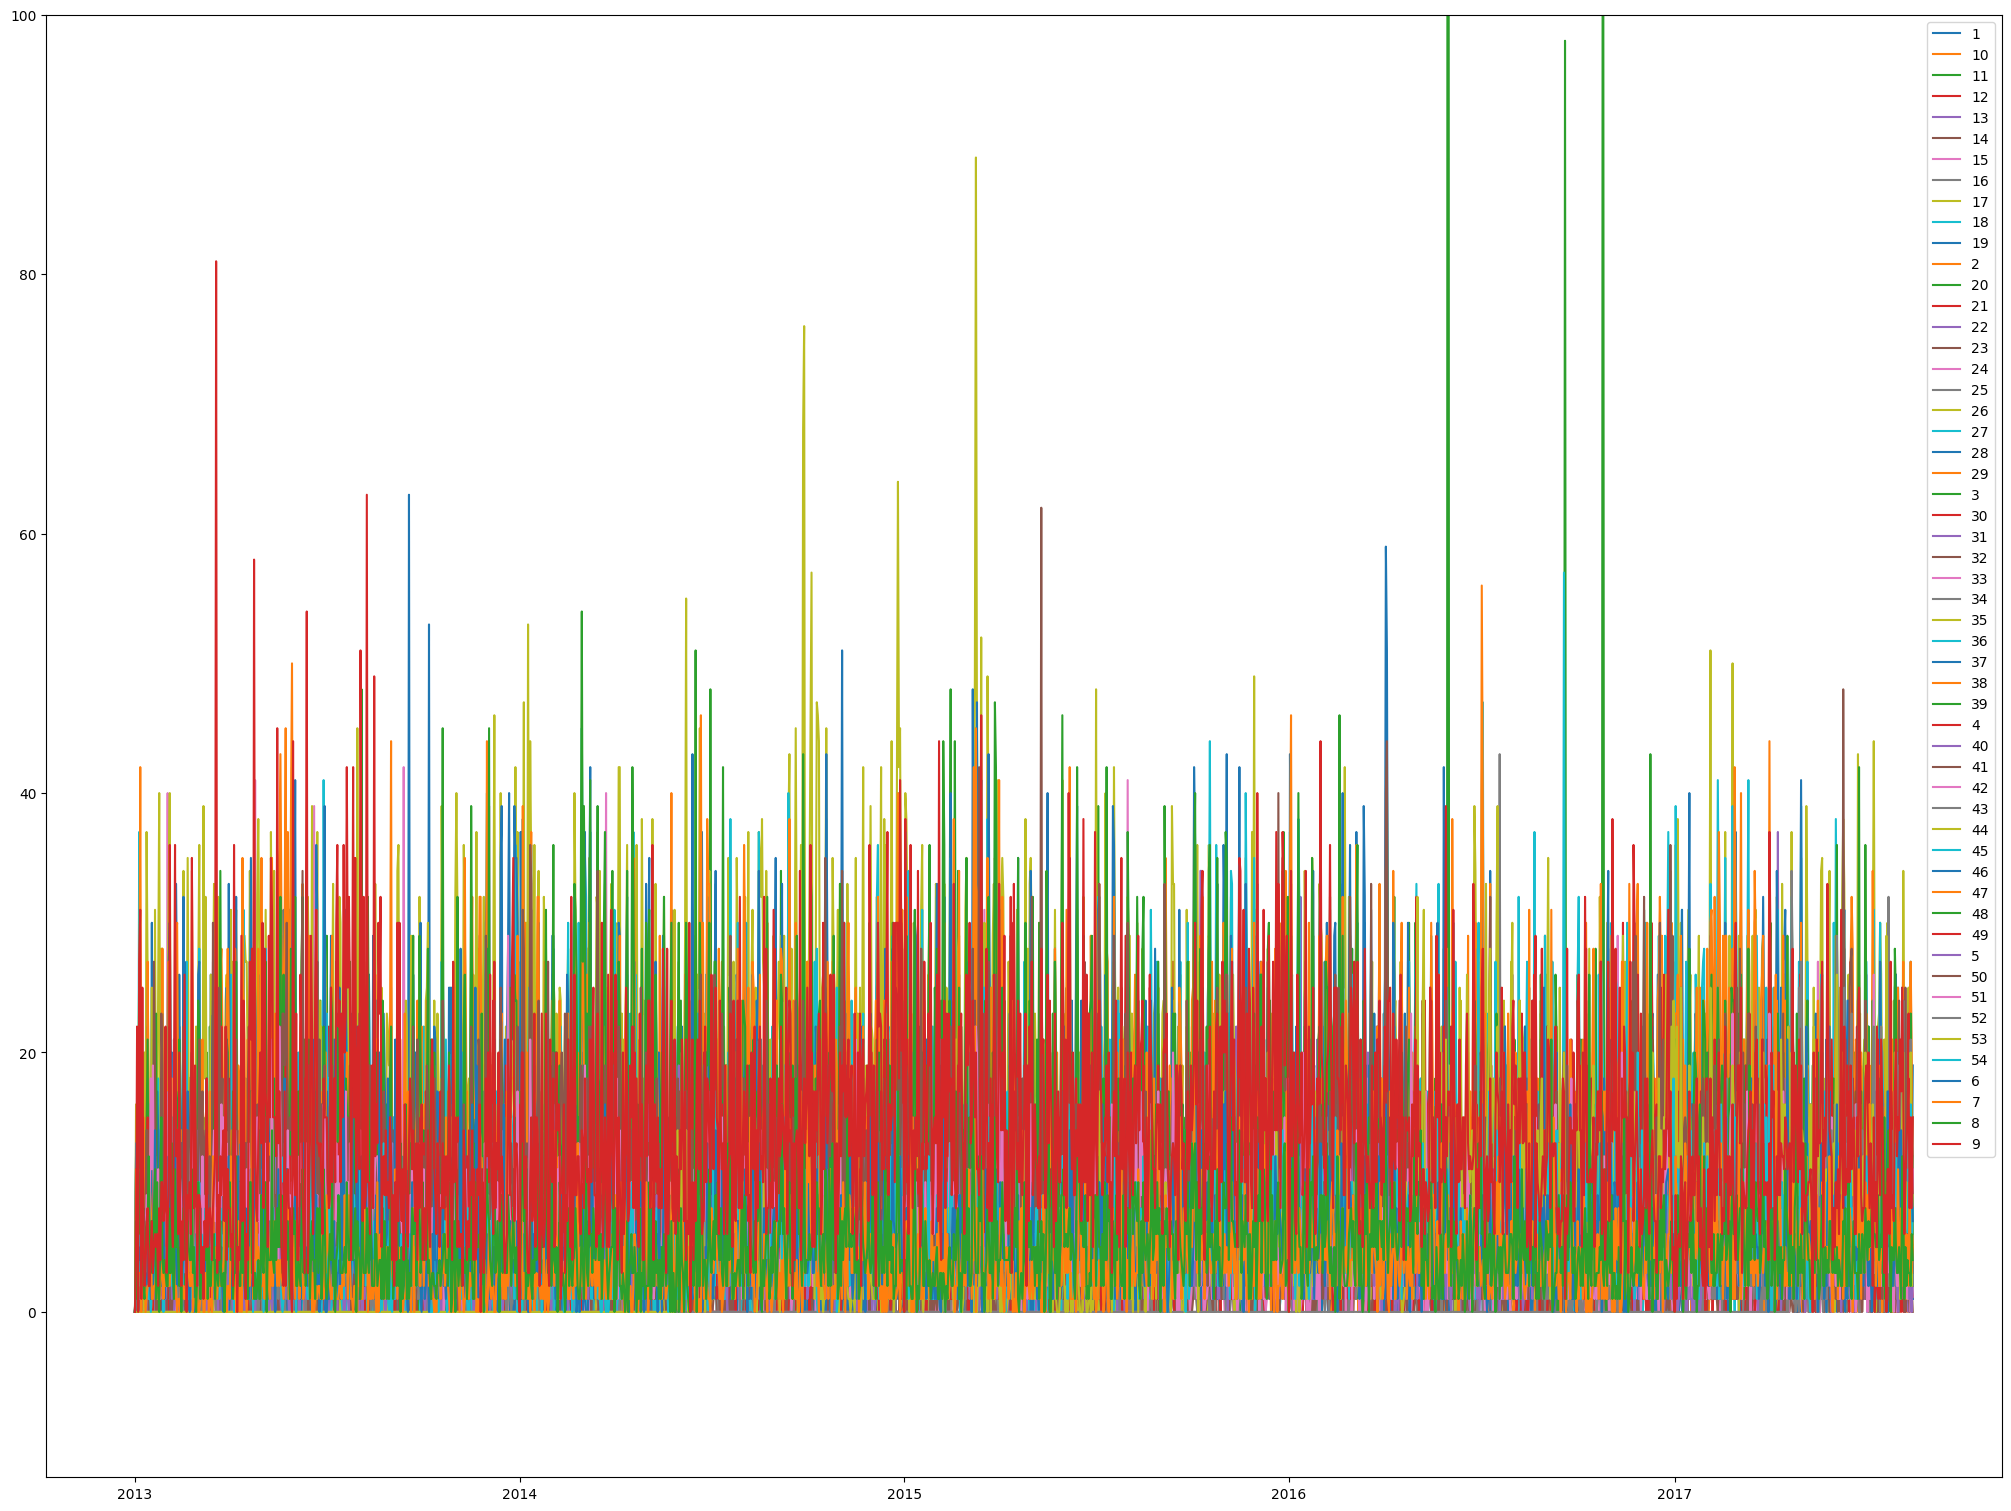

In [33]:
#plt.plot(family_df[0].date, family_df[0].sales, colors=family_df[0].store_nbr)
fig, ax = plt.subplots(figsize=(20,15), layout='constrained')
for i in store_id:
    ax.plot(family_df[0][family_df[0].store_nbr == i]['sales'], label=i)

    
plt.ylim(top=100)
plt.legend()
plt.show()

Way too messy

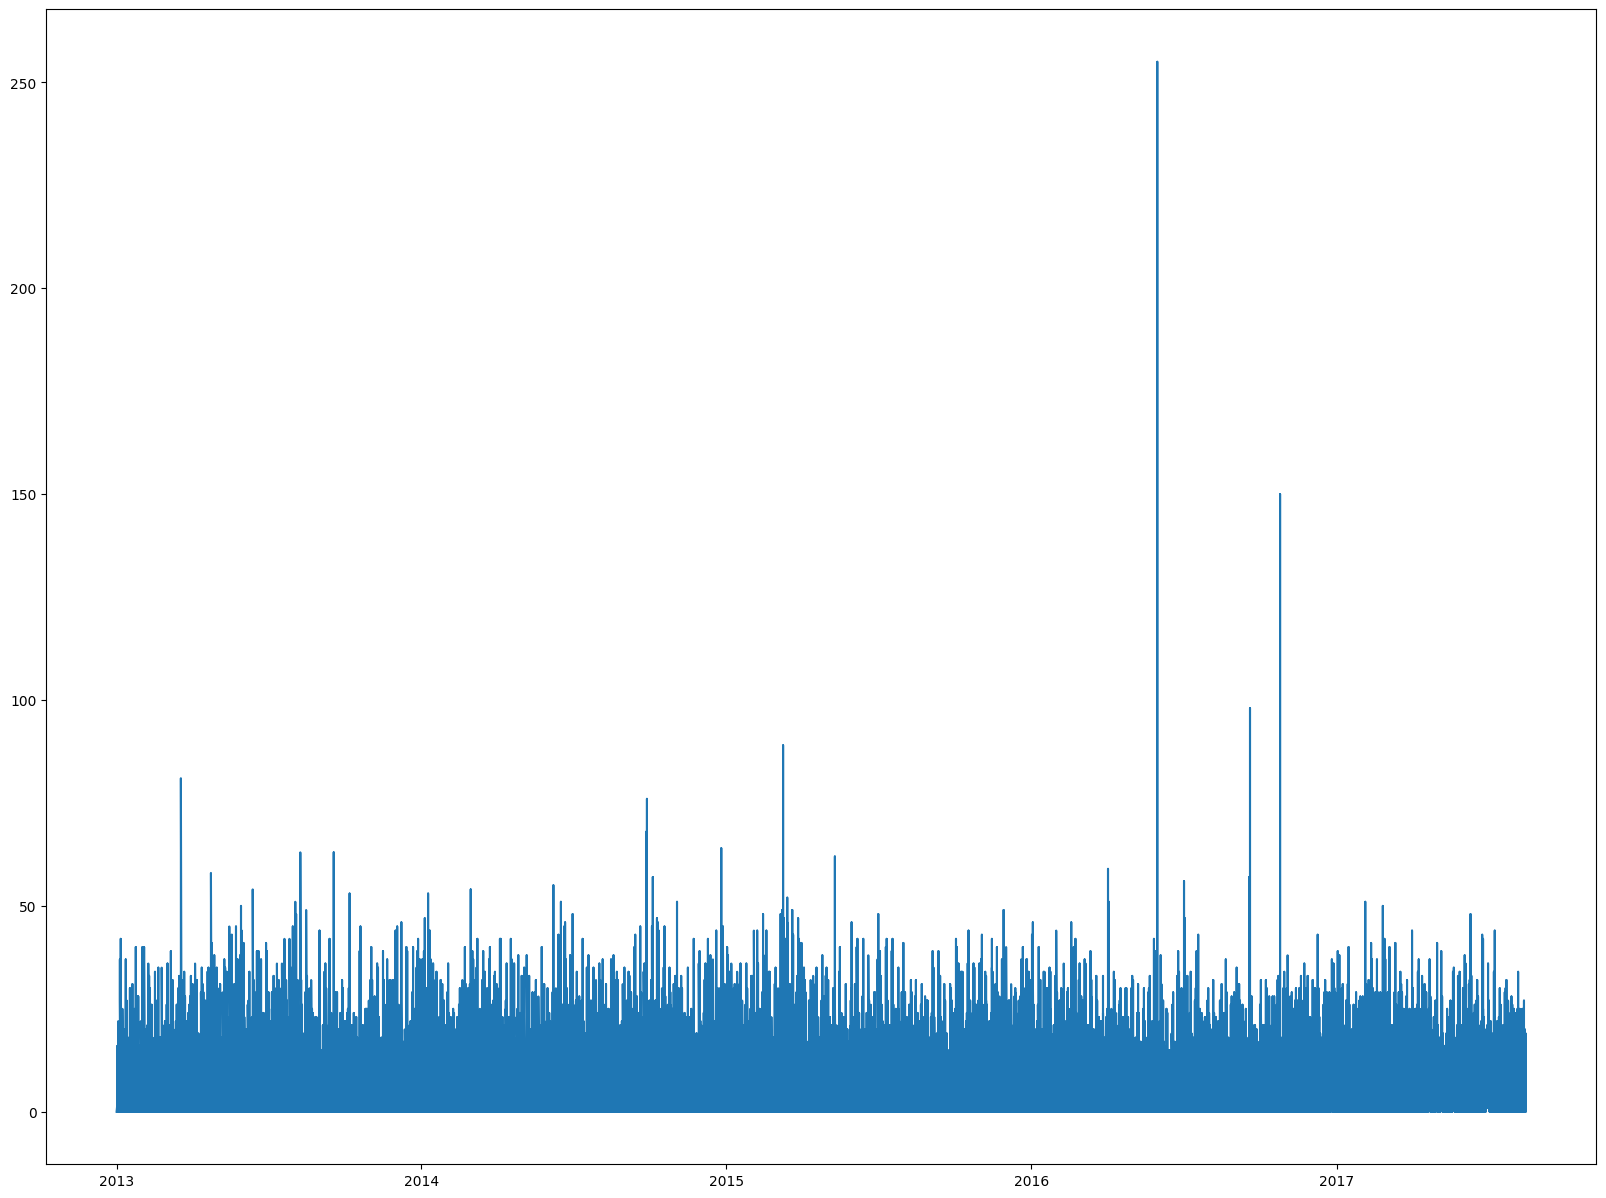

In [34]:
plt.figure(figsize=(20,15))
plt.plot(family_df[0]['sales'])


In [35]:
family_df[0][family_df[0].index>'01-01-2015']

id  store_nbr      family  sales  onpromotion
date                                                          
2015-01-02  1299078          1  AUTOMOTIVE    2.0            0
2015-01-02  1299111         10  AUTOMOTIVE    3.0            0
2015-01-02  1299144         11  AUTOMOTIVE    5.0            0
2015-01-02  1299177         12  AUTOMOTIVE    6.0            0
2015-01-02  1299210         13  AUTOMOTIVE    9.0            0
...             ...        ...         ...    ...          ...
2017-08-15  3000723         54  AUTOMOTIVE    8.0            0
2017-08-15  3000756          6  AUTOMOTIVE    7.0            0
2017-08-15  3000789          7  AUTOMOTIVE    5.0            0
2017-08-15  3000822          8  AUTOMOTIVE    4.0            0
2017-08-15  3000855          9  AUTOMOTIVE   15.0            0

[51570 rows x 5 columns]

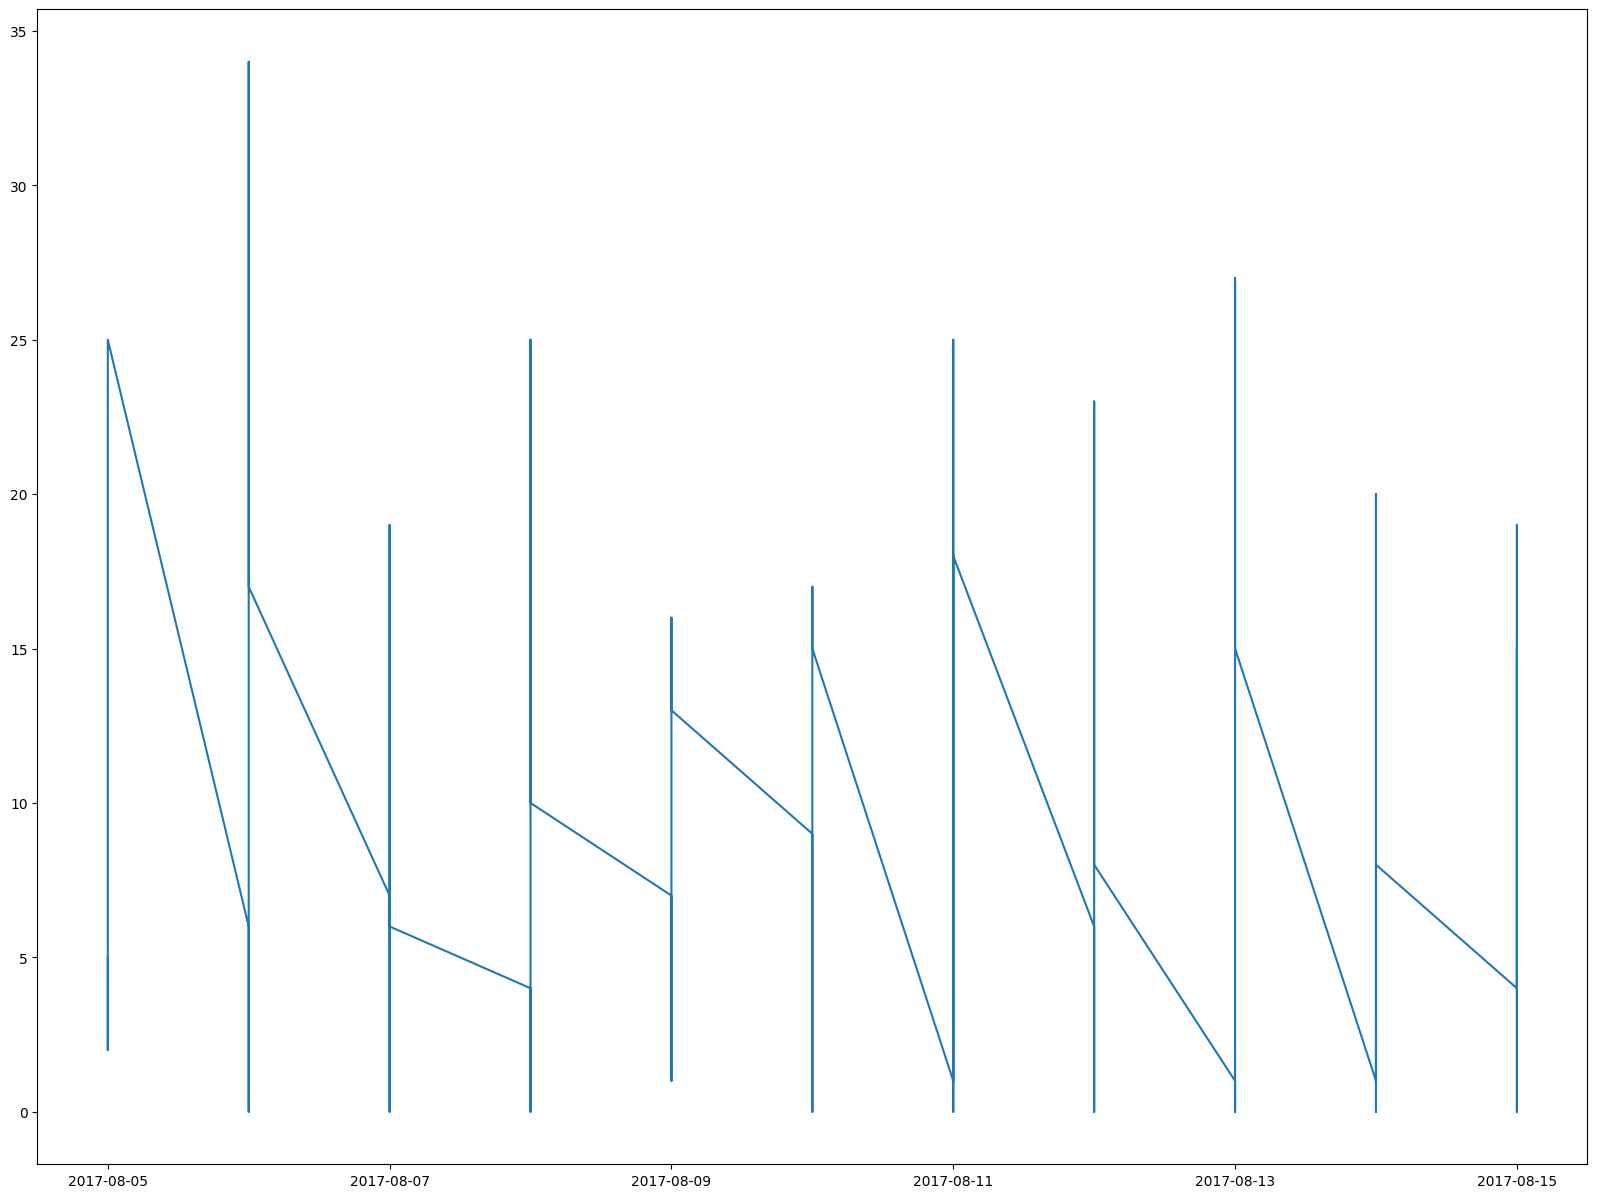

In [36]:
date_var = '08-04-2017'
fam_date_restricted = family_df[0][family_df[0].index>date_var]
plt.figure(figsize=(20,15))
plt.plot(fam_date_restricted['sales'])


In [37]:
family_df[0][(family_df[0].index>date_var) & (family_df[0]["sales"]==0)]

id  store_nbr      family  sales  onpromotion
date                                                          
2017-08-06  2983827         30  AUTOMOTIVE    0.0            0
2017-08-07  2985345         23  AUTOMOTIVE    0.0            0
2017-08-07  2985378         24  AUTOMOTIVE    0.0            0
2017-08-07  2985675         32  AUTOMOTIVE    0.0            0
2017-08-08  2986665         10  AUTOMOTIVE    0.0            0
2017-08-08  2986962         19  AUTOMOTIVE    0.0            0
2017-08-08  2987391         30  AUTOMOTIVE    0.0            0
2017-08-08  2987457         32  AUTOMOTIVE    0.0            0
2017-08-10  2990229         10  AUTOMOTIVE    0.0            0
2017-08-11  2992440         22  AUTOMOTIVE    0.0            0
2017-08-12  2994255         23  AUTOMOTIVE    0.0            0
2017-08-13  2995575         10  AUTOMOTIVE    0.0            0
2017-08-13  2996070         24  AUTOMOTIVE    0.0            0
2017-08-14  2997885         25  AUTOMOTIVE    0.0            0
2017-08-14  2998446         40  AUTOMOTIVE    0.0            0
2017-08-15  2999931         32  AUTOMOTIVE    0.0            0

We need to aggregate by date if we want to see how well the chain does overall (not by store)

In [38]:
fam_auto_sum = family_df[0].groupby('date').agg('sum').drop(columns=['id','store_nbr'])

C:\Users\Joseph Shire\AppData\Local\Temp\ipykernel_14828\1595541961.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fam_auto_sum = family_df[0].groupby('date').agg('sum').drop(columns=['id','store_nbr'])


In [39]:
fam_auto_sum

sales  onpromotion
date                          
2013-01-01    0.0            0
2013-01-02  255.0            0
2013-01-03  161.0            0
2013-01-04  169.0            0
2013-01-05  342.0            0
...           ...          ...
2017-08-11  441.0            0
2017-08-12  403.0            1
2017-08-13  481.0            0
2017-08-14  292.0            0
2017-08-15  337.0            1

[1684 rows x 2 columns]

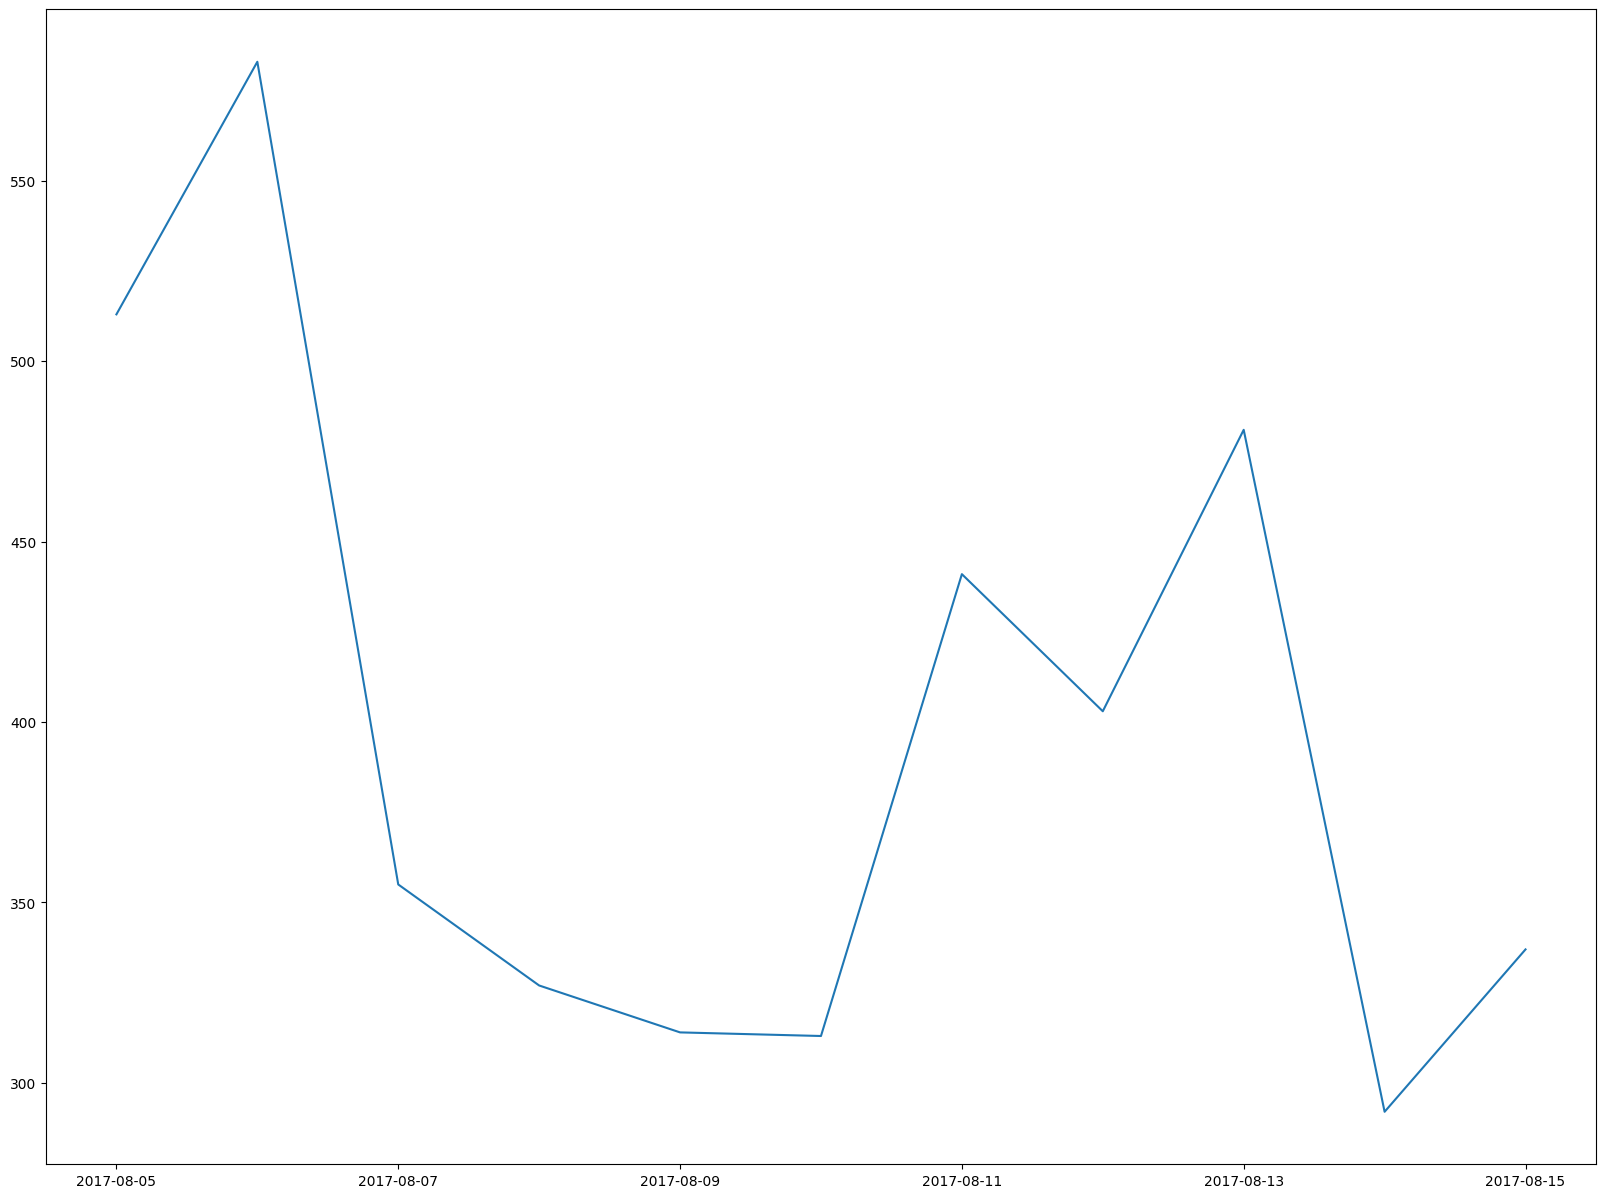

In [40]:
date_var = '08-04-2017'
fam_sum_date_restricted = fam_auto_sum[fam_auto_sum.index>date_var]
plt.figure(figsize=(20,15))
plt.plot(fam_sum_date_restricted['sales'])

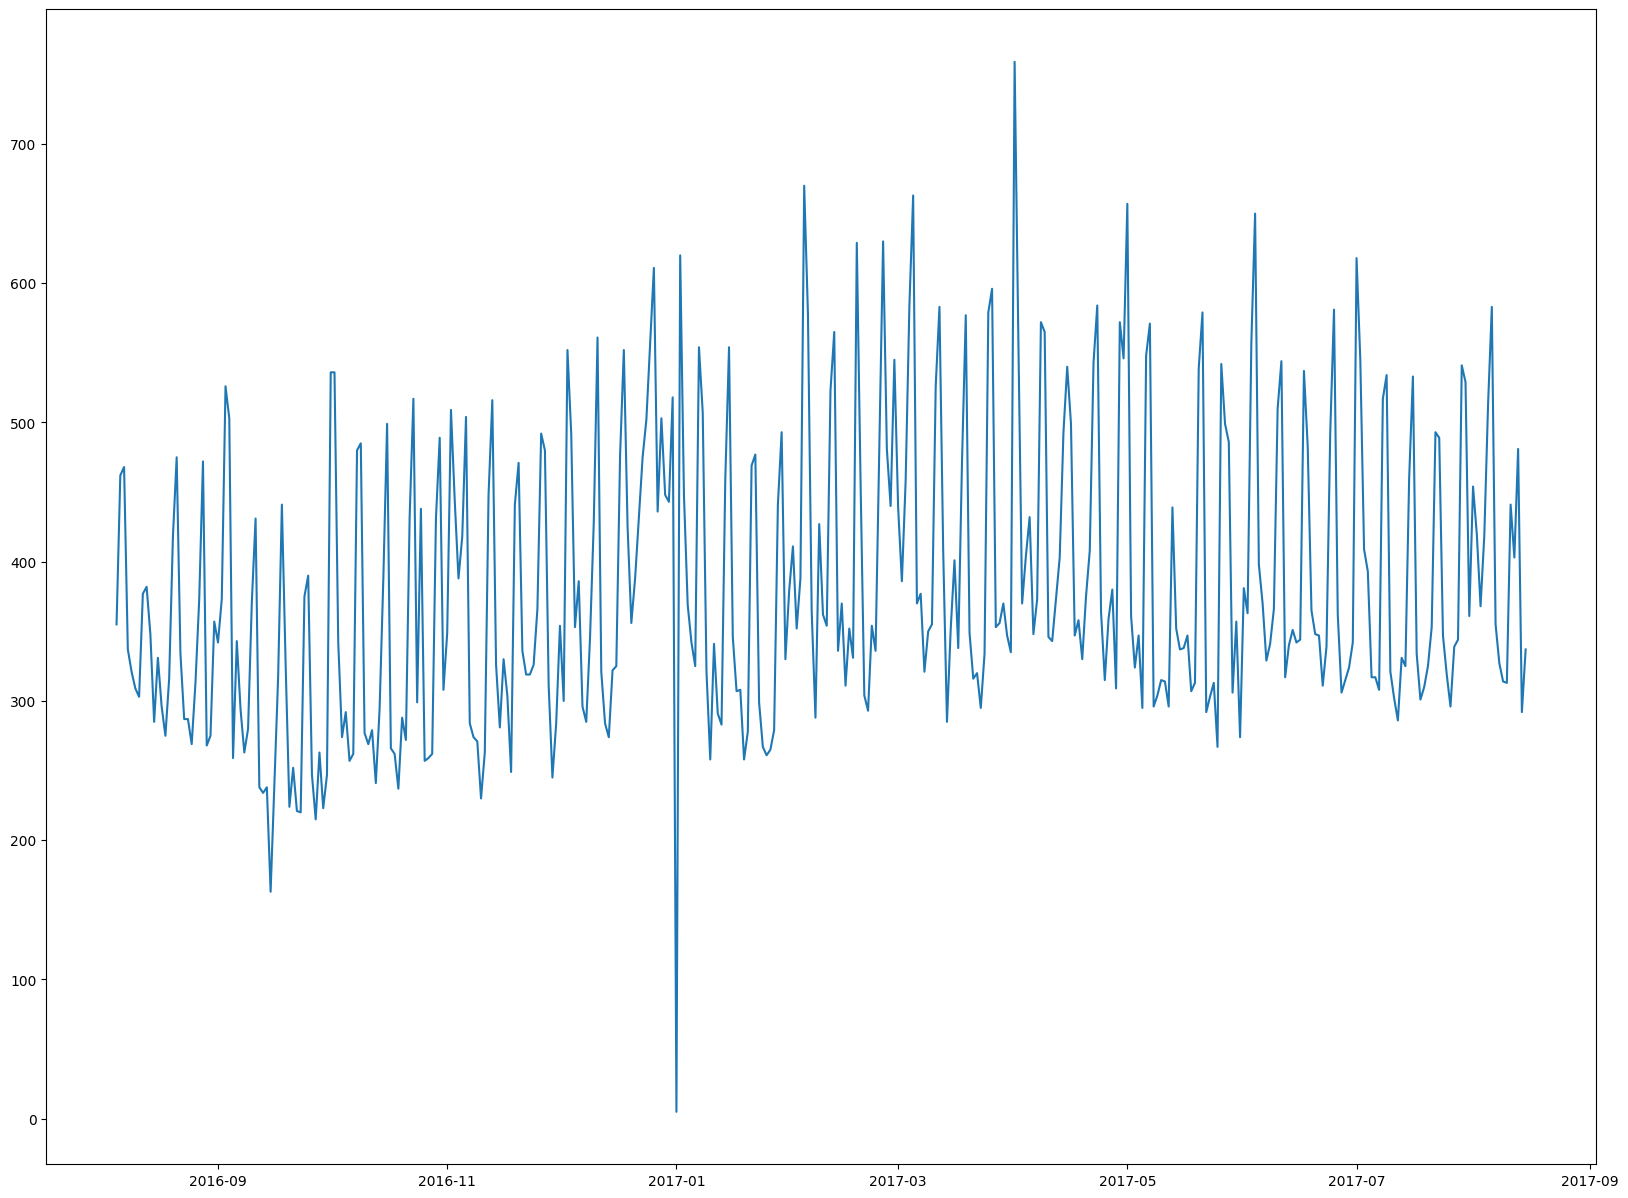

In [41]:
date_var = '08-04-2016'
fam_sum_date_restricted = fam_auto_sum[fam_auto_sum.index>date_var]
plt.figure(figsize=(20,15))
plt.plot(fam_sum_date_restricted['sales'])

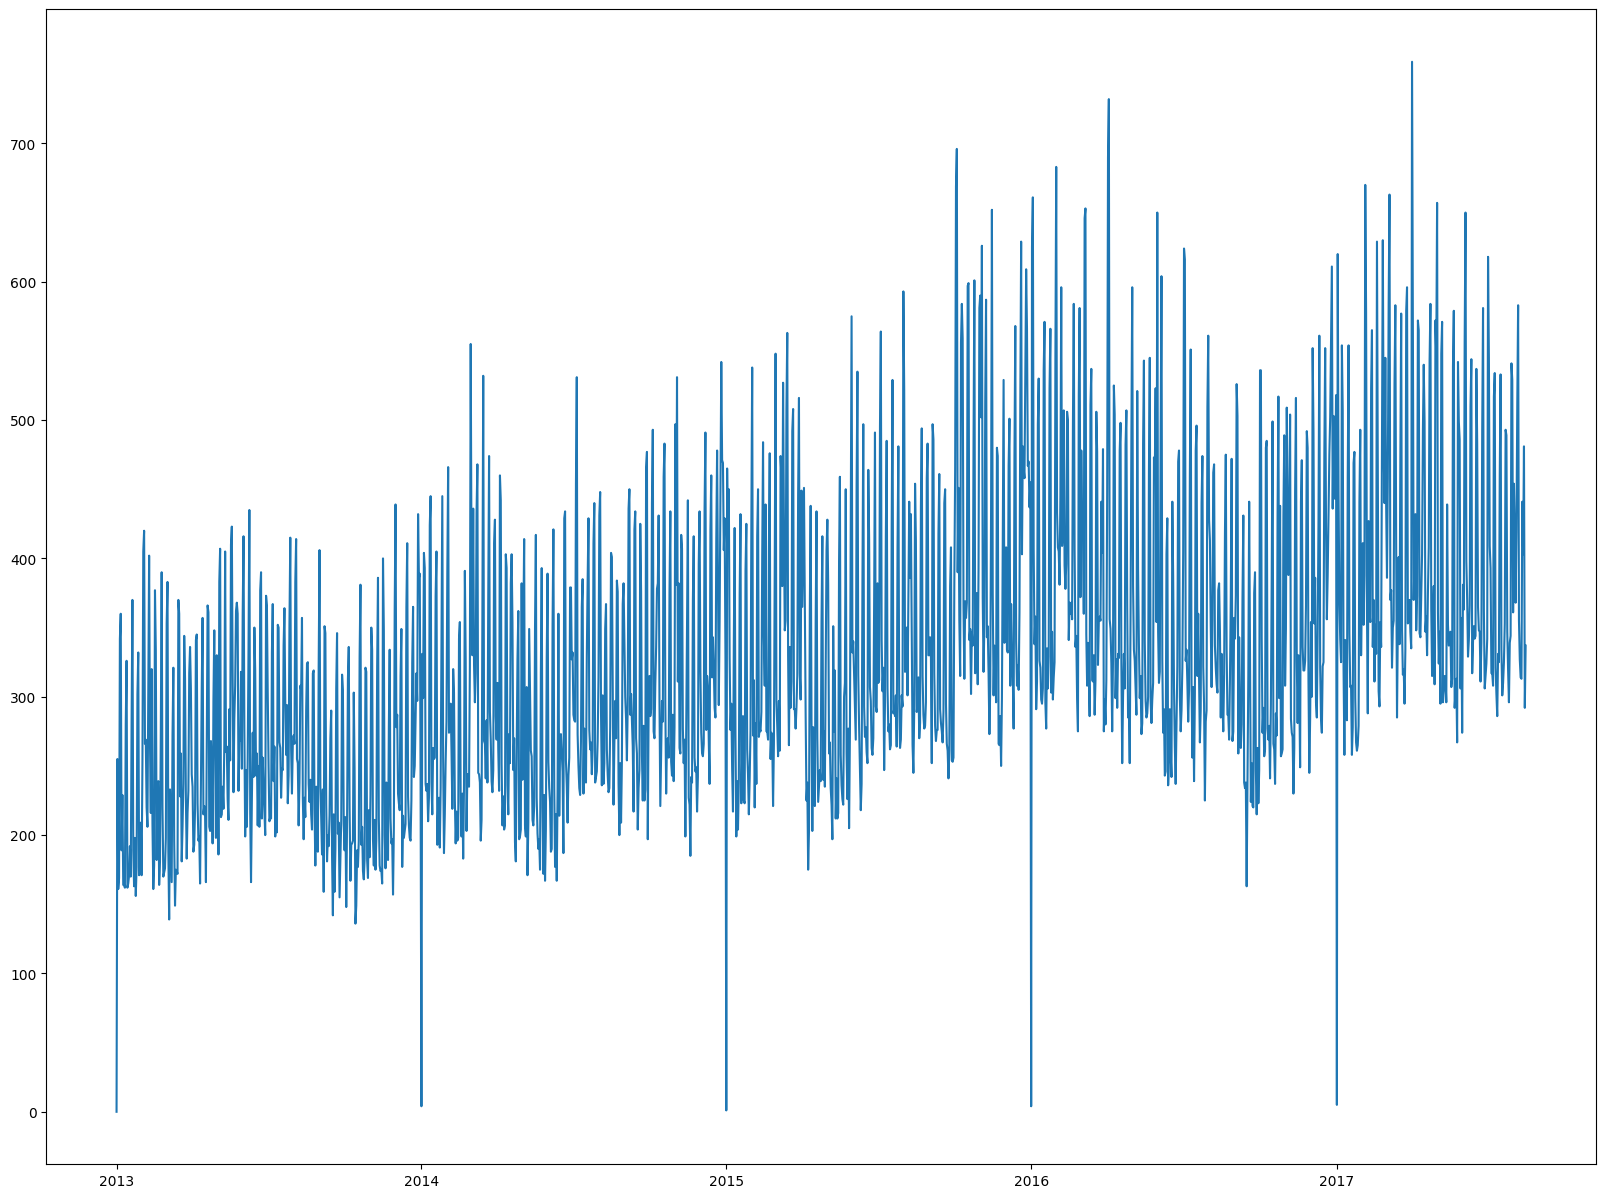

In [42]:
plt.figure(figsize=(20,15))
plt.plot(fam_auto_sum['sales'])

In [43]:
# assume zeros are the same as the following days
#fam_auto_sum['sales'].replace(to_replace = 0, value = fam_auto_sum['sales'].mean(), inplace=True)

In [44]:
fam_auto_sum.head()

sales  onpromotion
date                          
2013-01-01    0.0            0
2013-01-02  255.0            0
2013-01-03  161.0            0
2013-01-04  169.0            0
2013-01-05  342.0            0

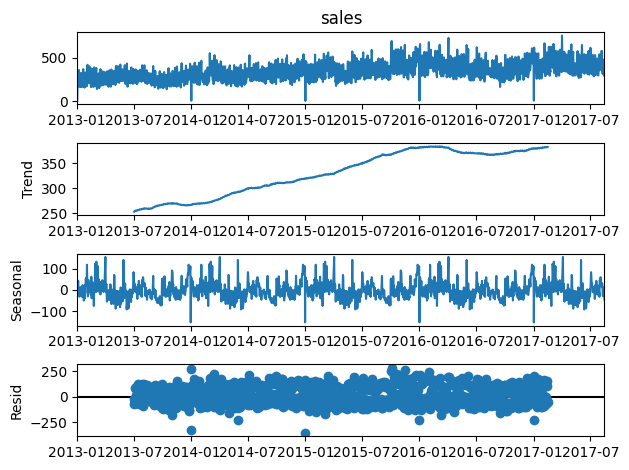

In [45]:
result = seasonal_decompose(fam_auto_sum['sales'],model='additive',period=365)

# Plot the original data, the trend, the seasonality, and the residuals 
result.plot();

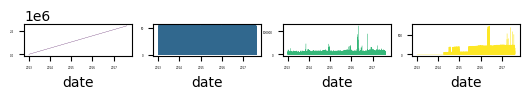

In [46]:
train_df.plot(subplots=True, 
          layout=(10,4), 
          sharex=False, 
          sharey=False, 
          colormap='viridis', 
          fontsize=2, 
          legend=False, 
          linewidth=0.2)

plt.show()

group by region and run again

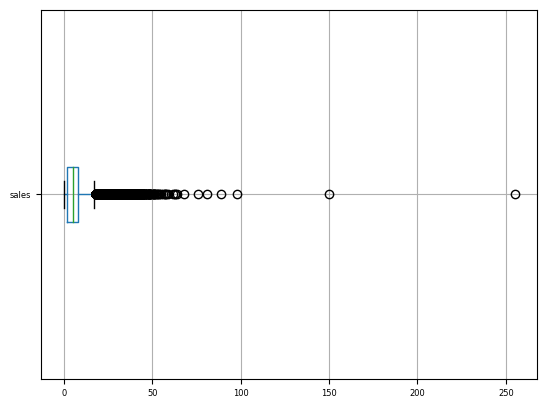

In [47]:
family_df[0][['sales']].boxplot(fontsize=6, vert=False)
plt.show()

In [48]:
store_info_csv = train_csv.merge(stores,on=['store_nbr']).set_index('date')
store_info = store_info_csv.drop(columns=['id'])
store_info.head()

store_nbr      family  sales  onpromotion   city      state type  \
date                                                                           
2013-01-01          1  AUTOMOTIVE    0.0            0  Quito  Pichincha    D   
2013-01-01          1   BABY CARE    0.0            0  Quito  Pichincha    D   
2013-01-01          1      BEAUTY    0.0            0  Quito  Pichincha    D   
2013-01-01          1   BEVERAGES    0.0            0  Quito  Pichincha    D   
2013-01-01          1       BOOKS    0.0            0  Quito  Pichincha    D   

            cluster  
date                 
2013-01-01       13  
2013-01-01       13  
2013-01-01       13  
2013-01-01       13  
2013-01-01       13

In [49]:
store_grouped_type_family = store_info.groupby(['type','family','date']).agg('sum').drop(columns=['cluster','store_nbr'])
len(store_grouped_type_family)

C:\Users\Joseph Shire\AppData\Local\Temp\ipykernel_14828\2906276881.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  store_grouped_type_family = store_info.groupby(['type','family','date']).agg('sum').drop(columns=['cluster','store_nbr'])


277860

In [50]:
store_grouped_type_family.reset_index(level='date',inplace=True)
store_grouped_type_family.head()

date  sales  onpromotion
type family                                   
A    AUTOMOTIVE 2013-01-01    0.0            0
     AUTOMOTIVE 2013-01-02   72.0            0
     AUTOMOTIVE 2013-01-03   33.0            0
     AUTOMOTIVE 2013-01-04   45.0            0
     AUTOMOTIVE 2013-01-05  136.0            0

In [51]:
store_grouped_type_family.columns

Index(['date', 'sales', 'onpromotion'], dtype='object')

In [52]:
store_grouped_type_family.index.unique()

MultiIndex([('A',                 'AUTOMOTIVE'),
            ('A',                  'BABY CARE'),
            ('A',                     'BEAUTY'),
            ('A',                  'BEVERAGES'),
            ('A',                      'BOOKS'),
            ('A',               'BREAD/BAKERY'),
            ('A',                'CELEBRATION'),
            ('A',                   'CLEANING'),
            ('A',                      'DAIRY'),
            ('A',                       'DELI'),
            ...
            ('E',                  'MAGAZINES'),
            ('E',                      'MEATS'),
            ('E',              'PERSONAL CARE'),
            ('E',               'PET SUPPLIES'),
            ('E',    'PLAYERS AND ELECTRONICS'),
            ('E',                    'POULTRY'),
            ('E',             'PREPARED FOODS'),
            ('E',                    'PRODUCE'),
            ('E', 'SCHOOL AND OFFICE SUPPLIES'),
            ('E',                    'SEAFOOD')],
   

In [53]:
store_grouped_type_family.sales

type  family    
A     AUTOMOTIVE      0.0
      AUTOMOTIVE     72.0
      AUTOMOTIVE     33.0
      AUTOMOTIVE     45.0
      AUTOMOTIVE    136.0
                    ...  
E     SEAFOOD        18.0
      SEAFOOD        16.0
      SEAFOOD        19.0
      SEAFOOD        12.0
      SEAFOOD        16.0
Name: sales, Length: 277860, dtype: float64

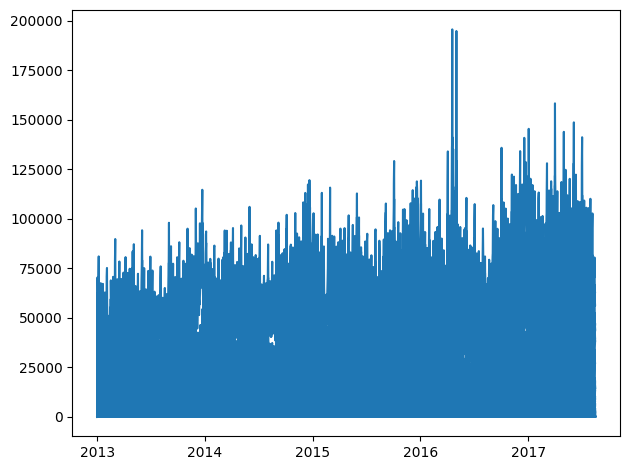

In [54]:
# store_grouped_type_family.plot(store_grouped_type_family['sales'])

plt.plot(store_grouped_type_family.date,store_grouped_type_family.sales)
plt.tight_layout()

In [55]:
store_grouped_type_family.index.unique()[0][0]

'A'

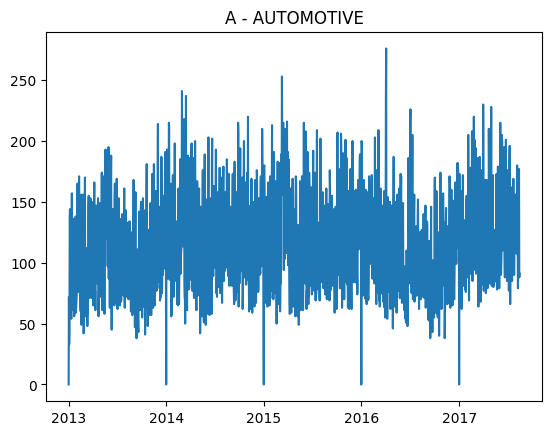

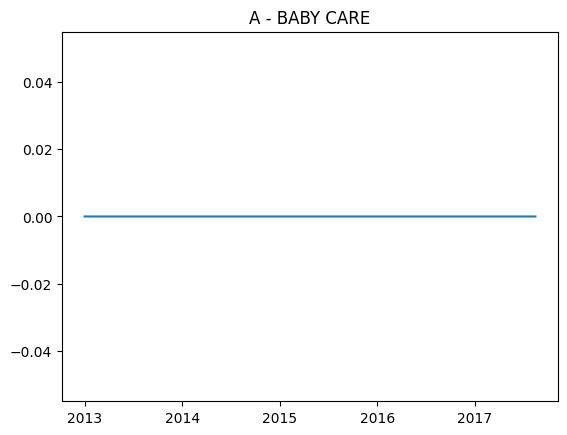

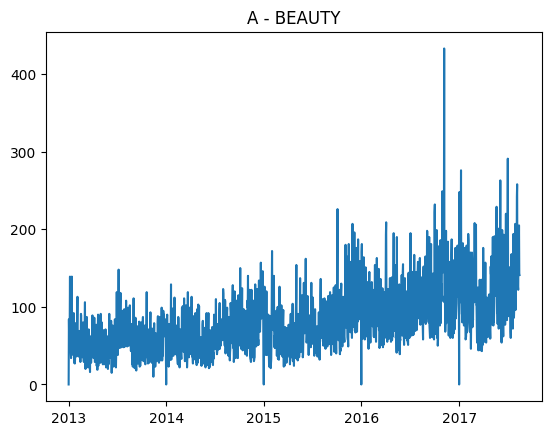

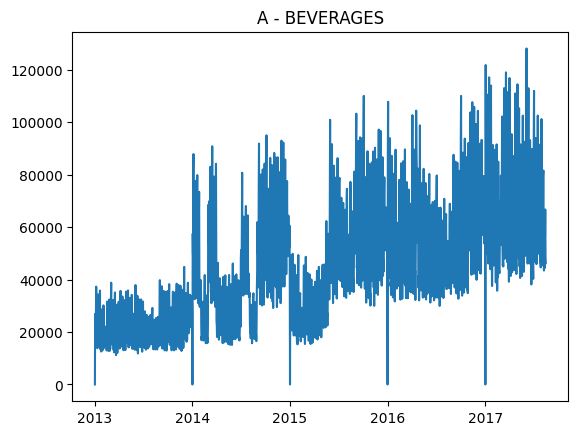

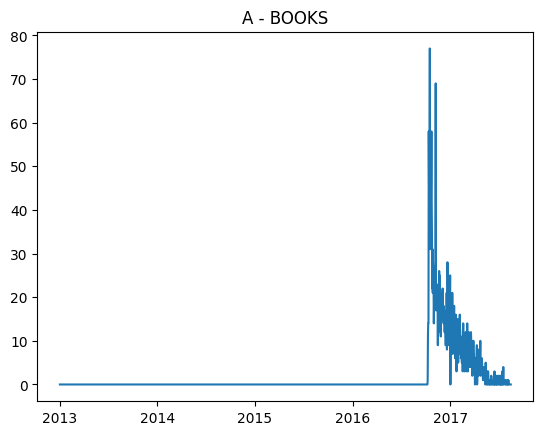

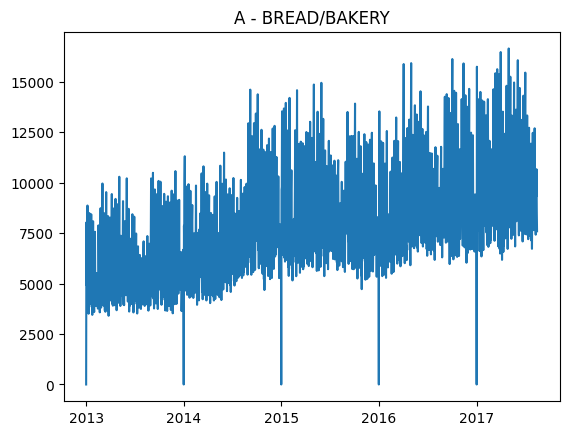

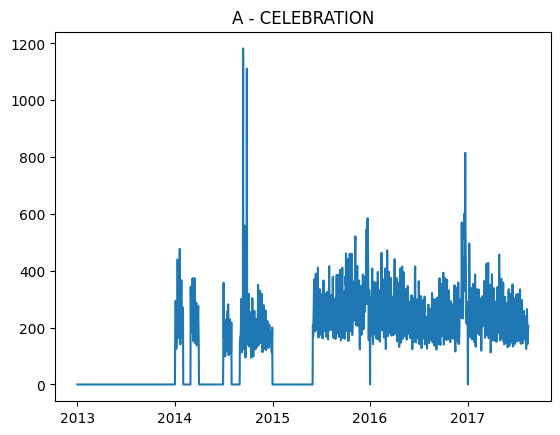

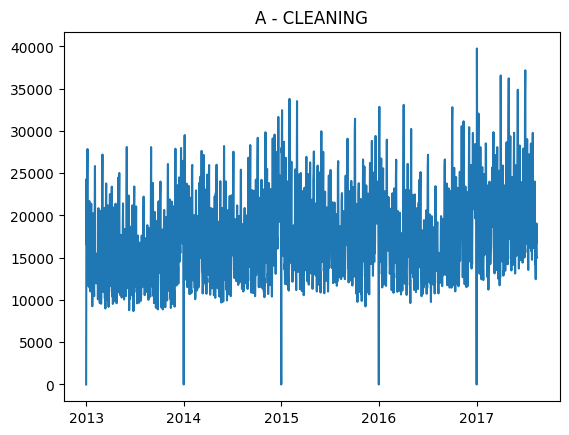

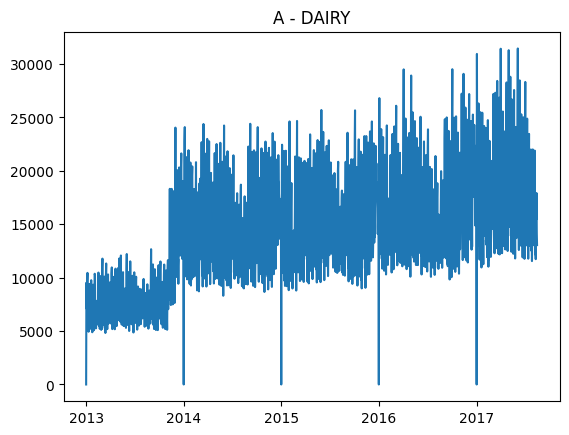

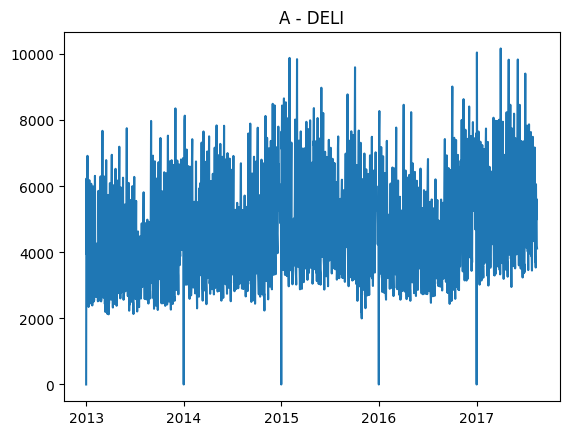

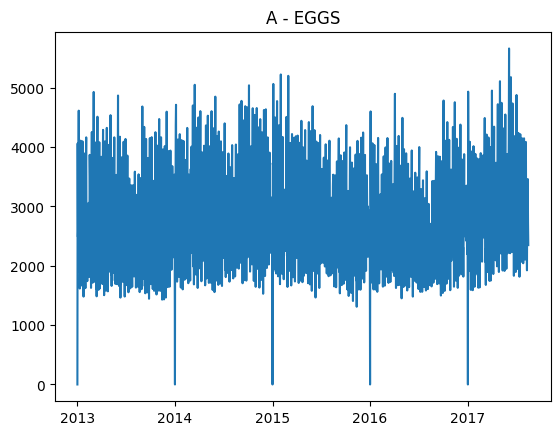

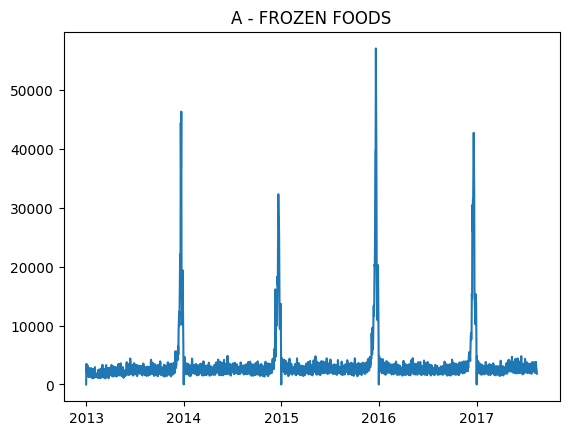

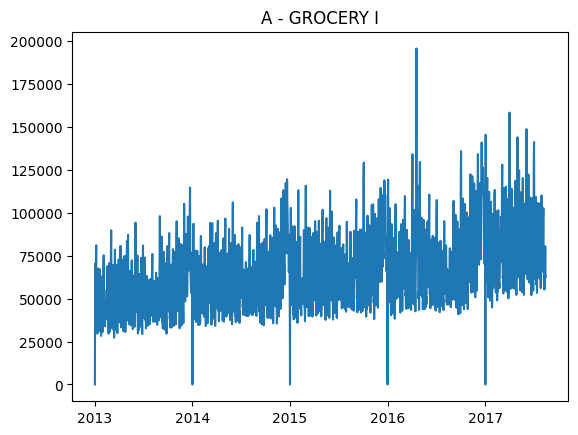

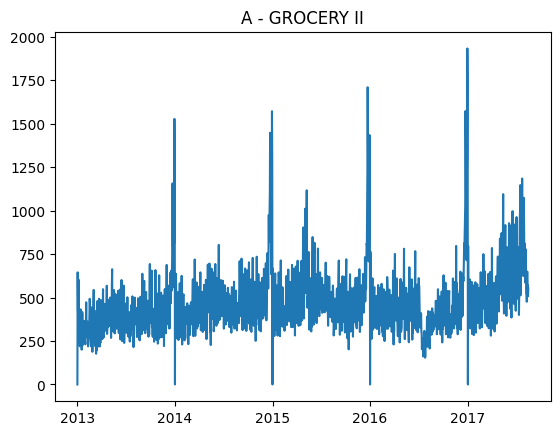

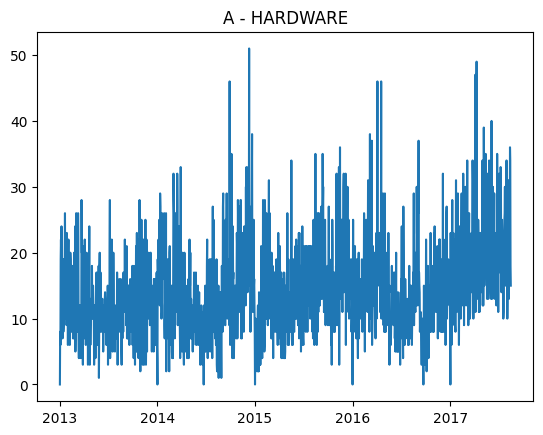

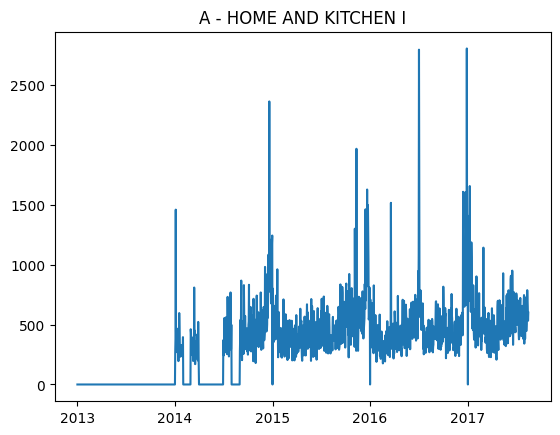

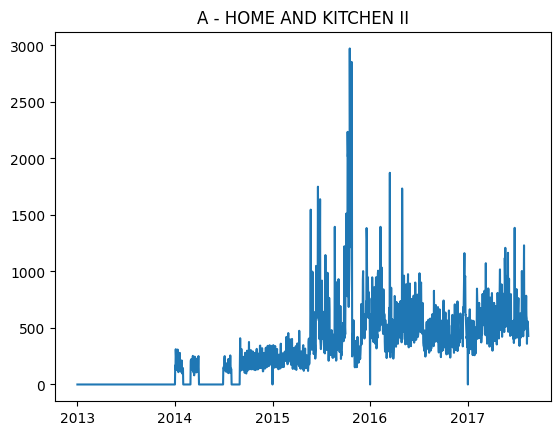

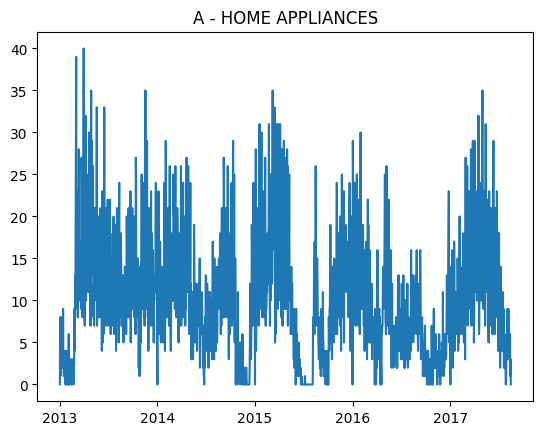

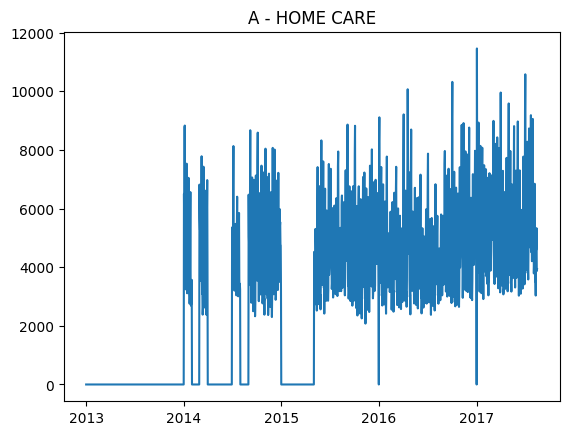

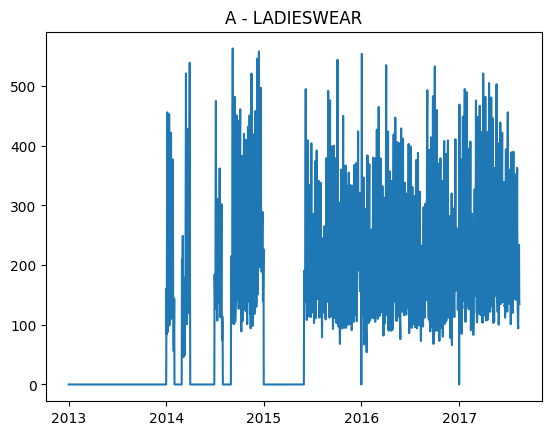

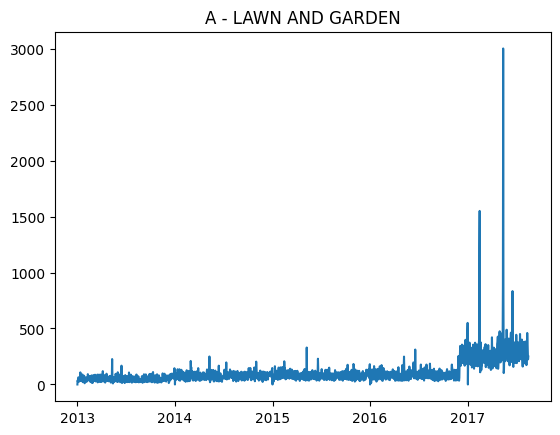

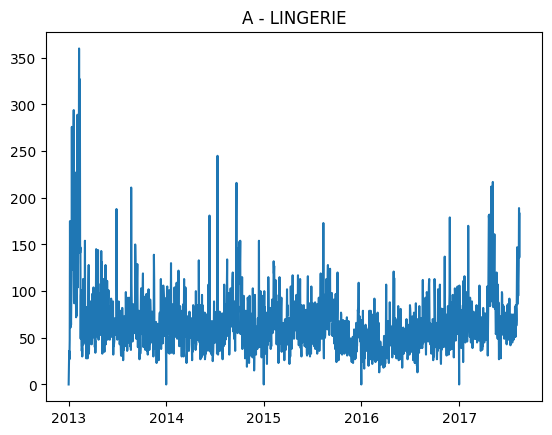

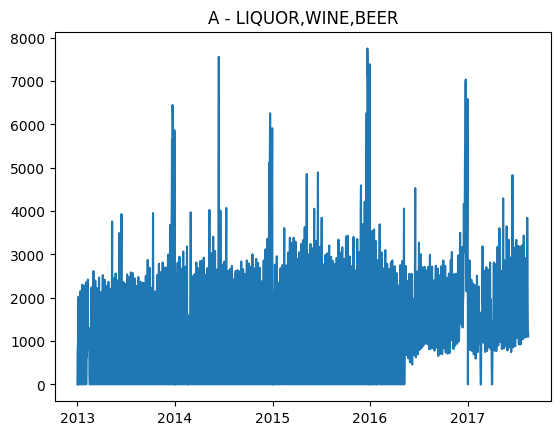

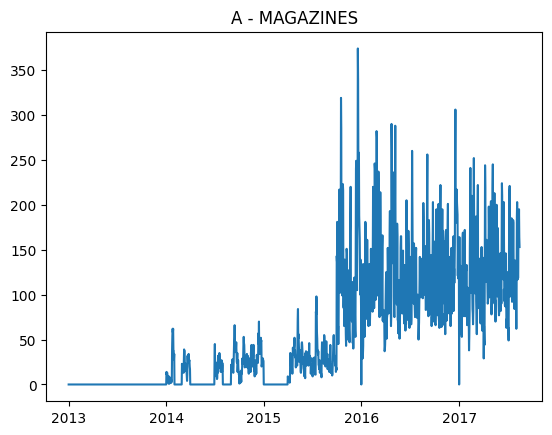

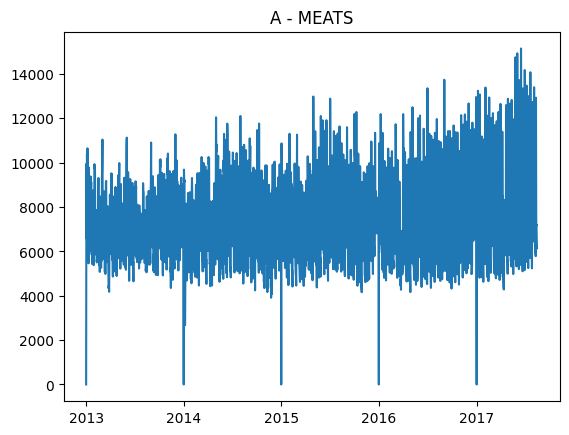

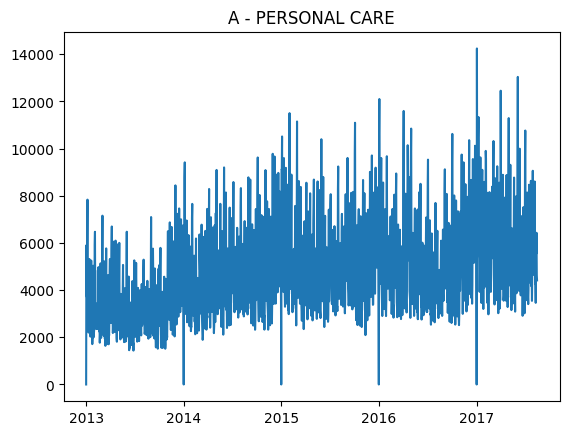

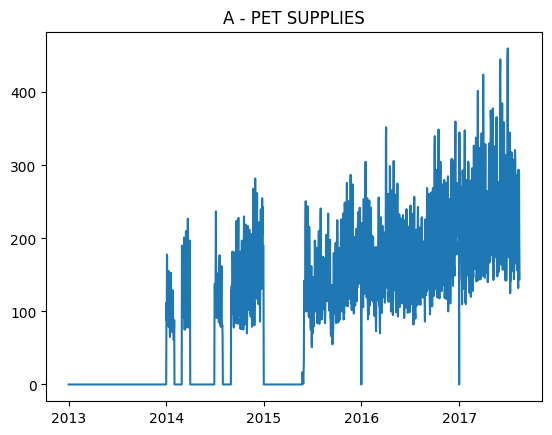

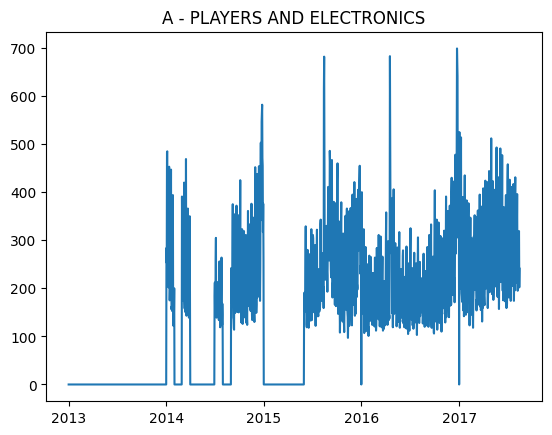

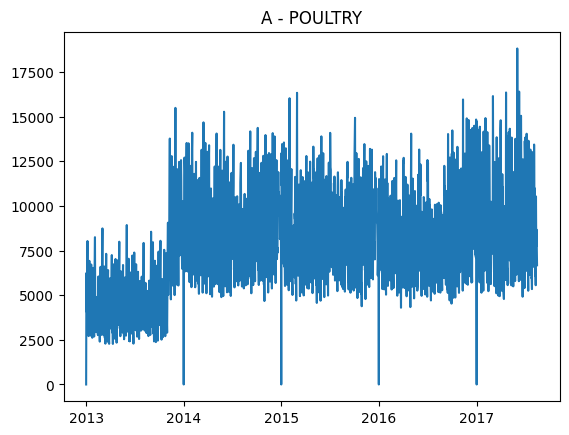

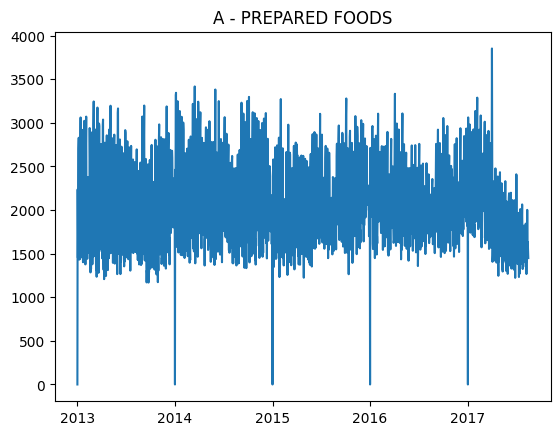

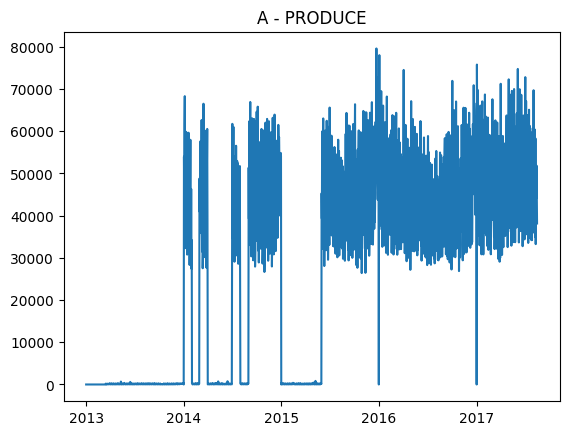

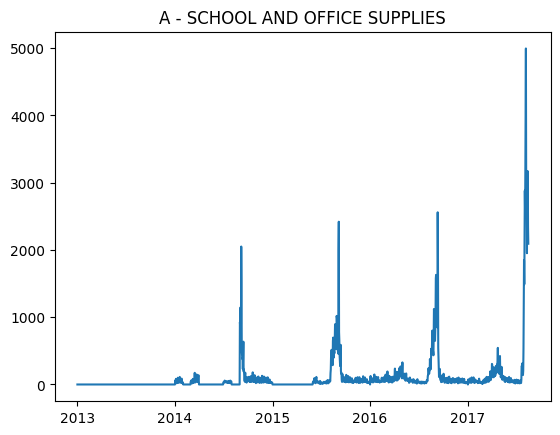

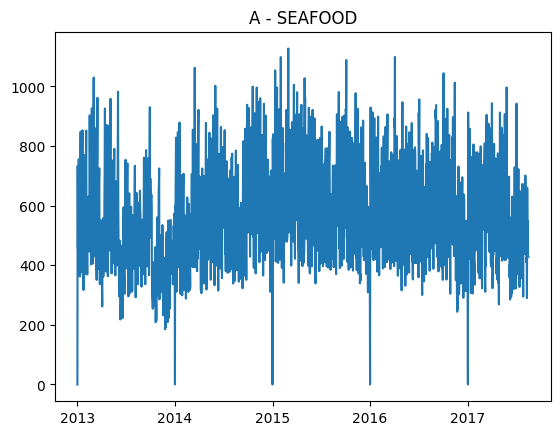

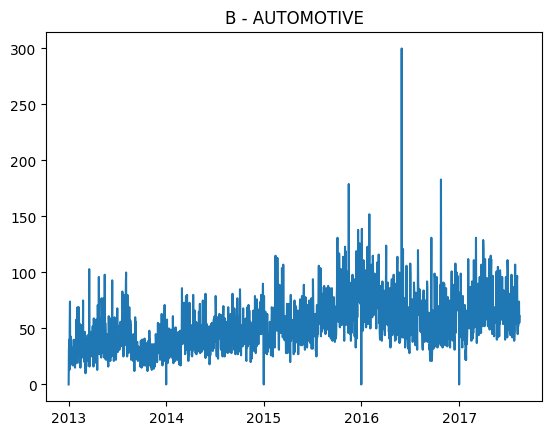

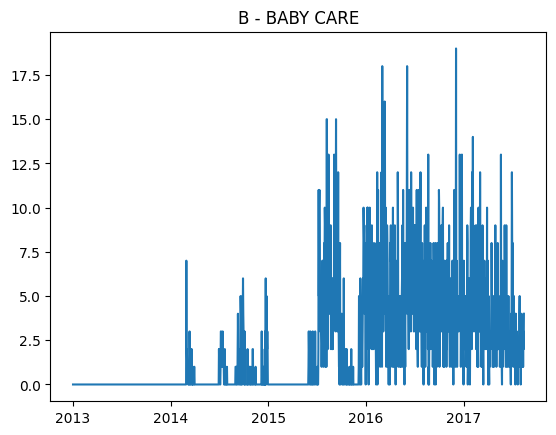

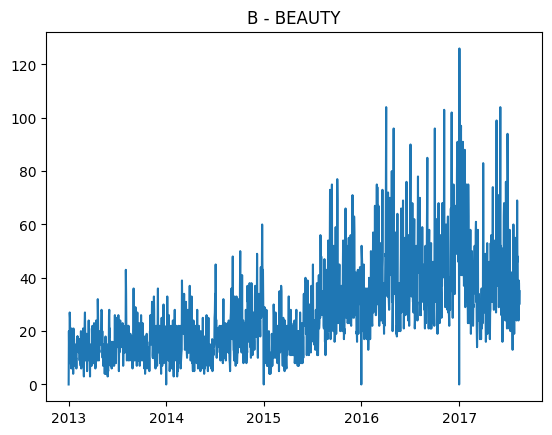

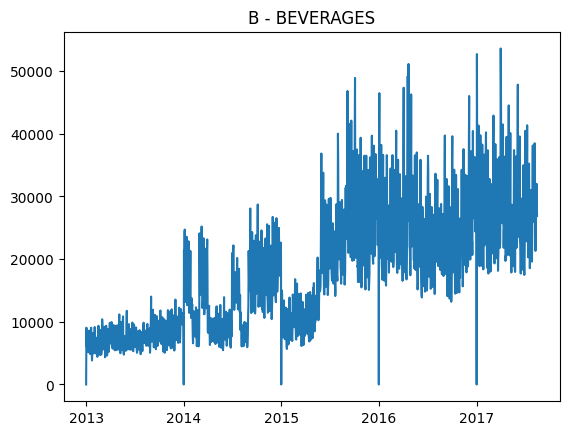

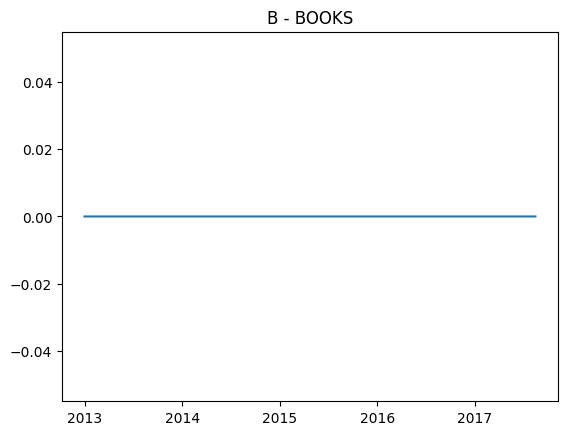

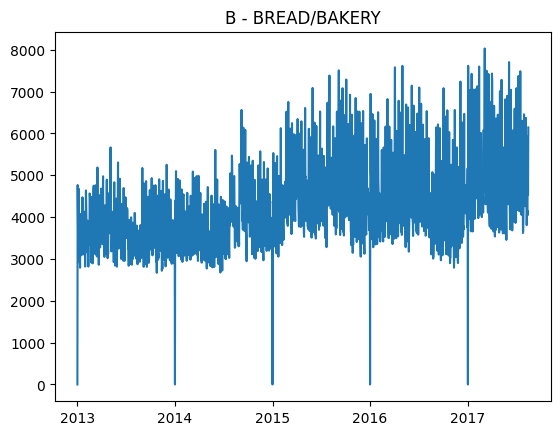

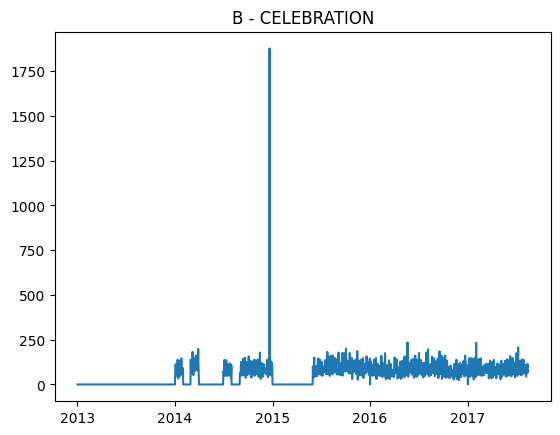

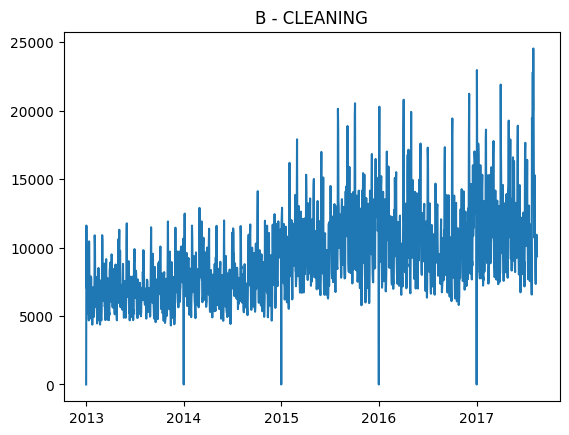

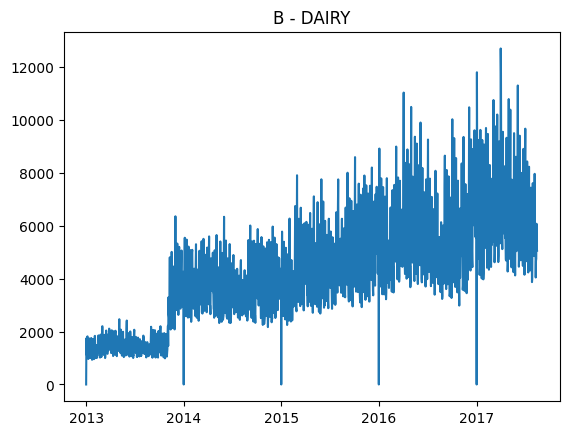

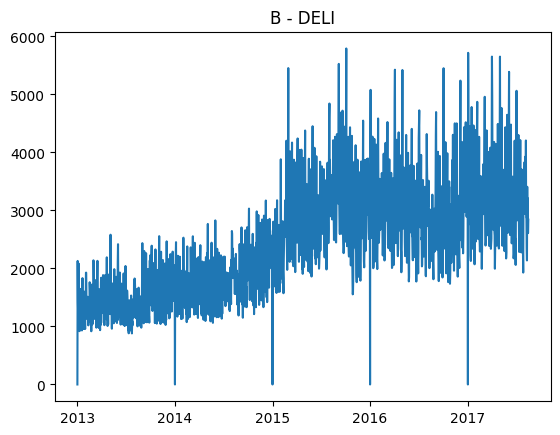

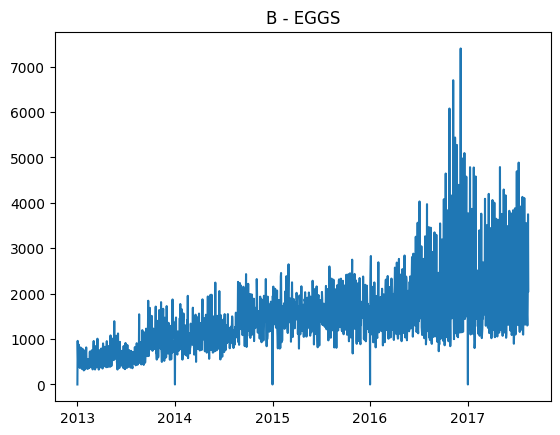

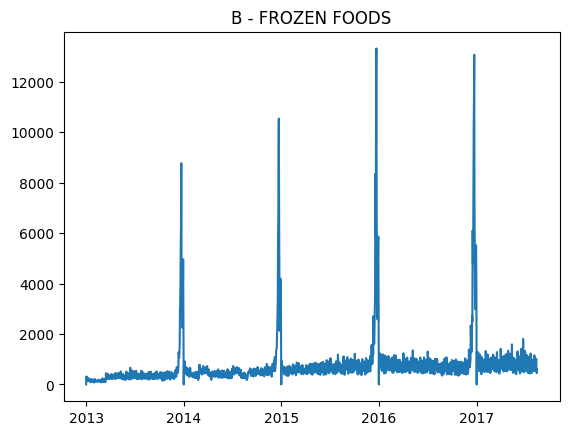

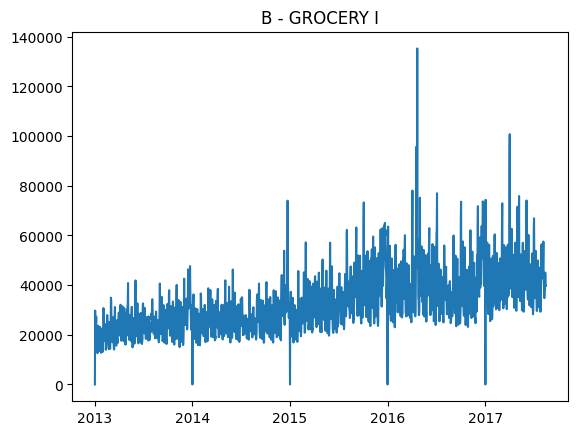

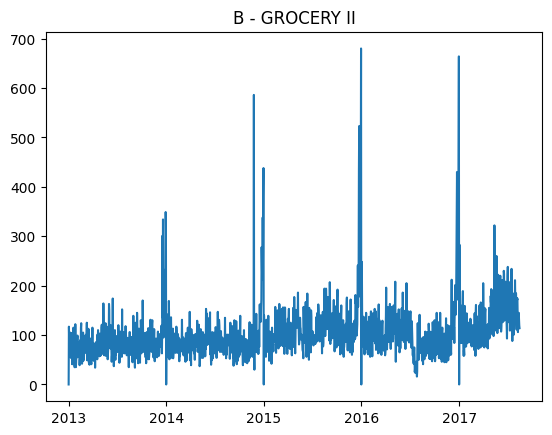

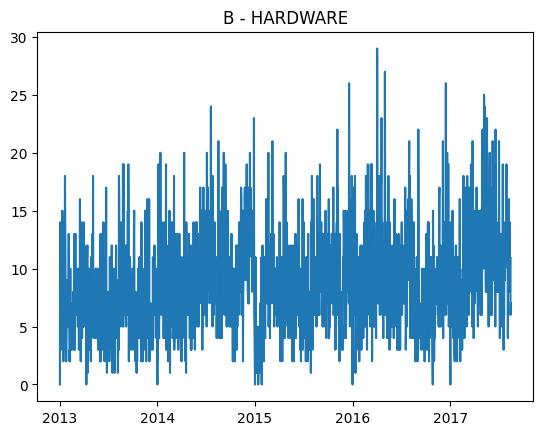

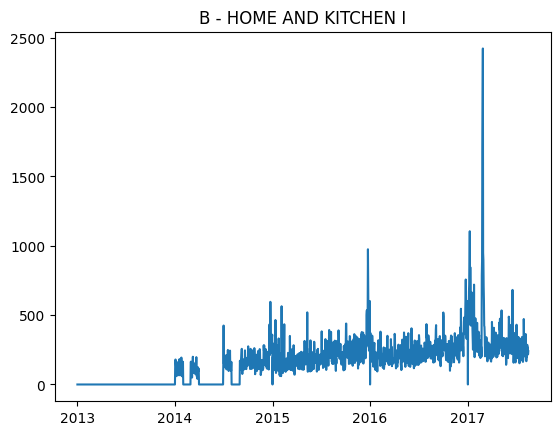

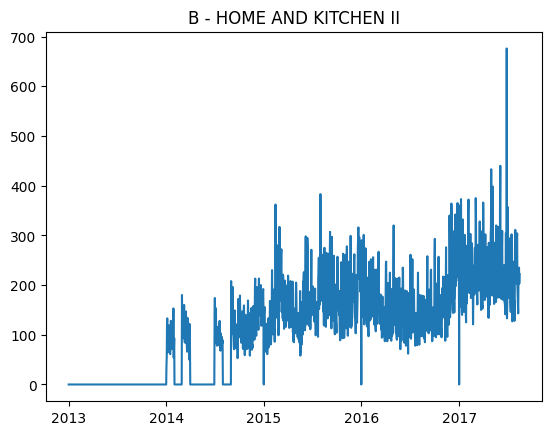

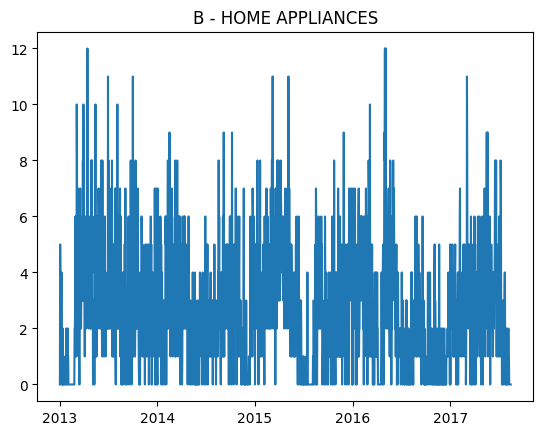

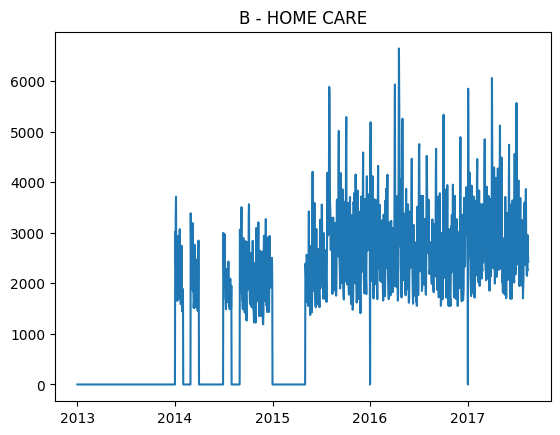

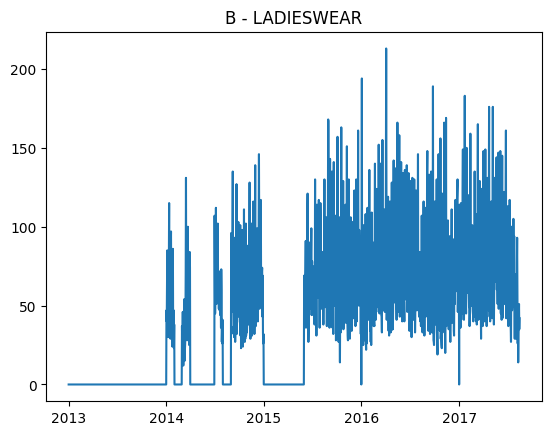

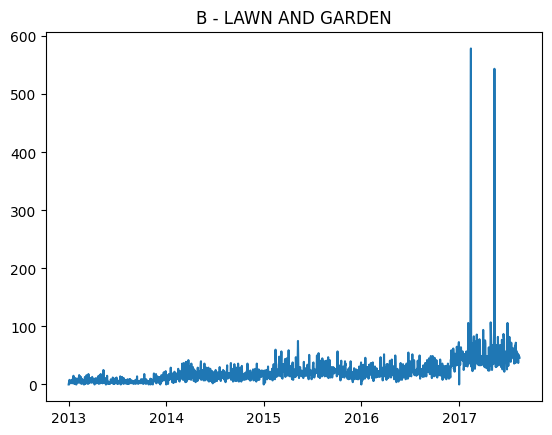

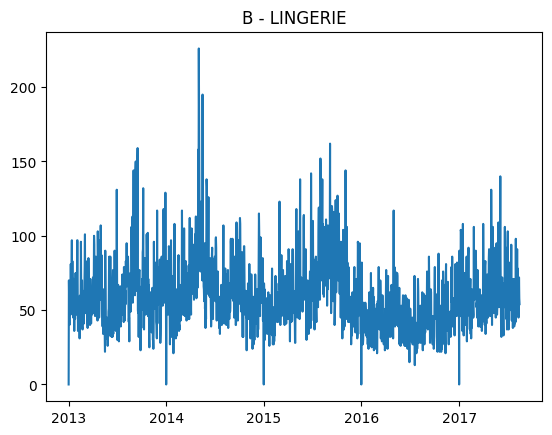

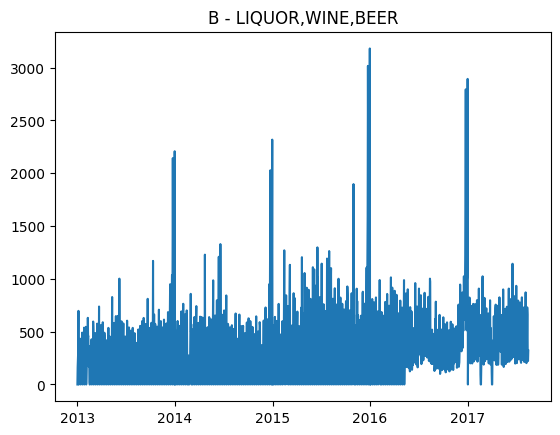

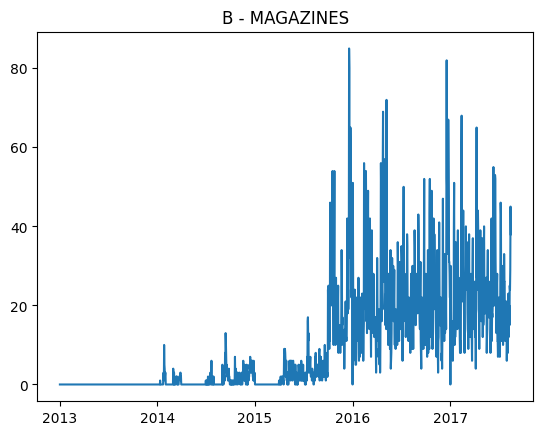

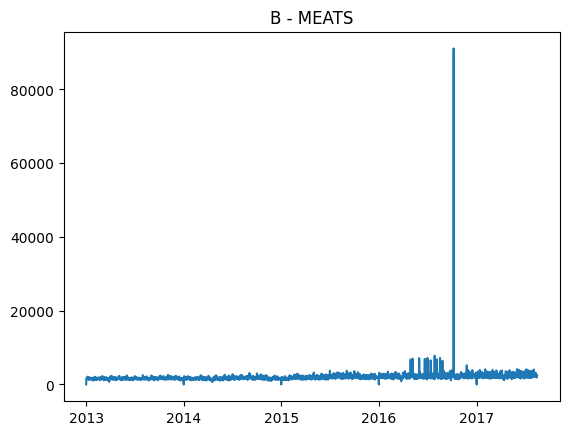

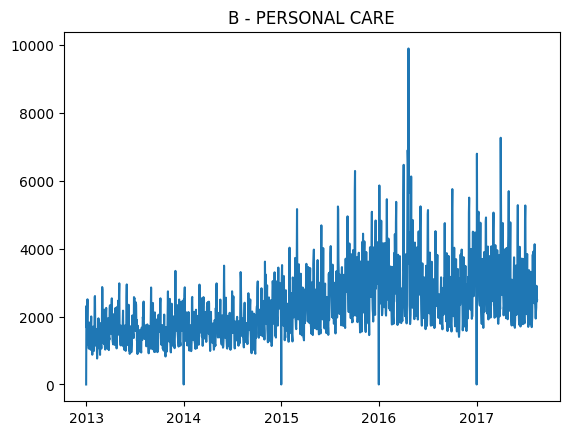

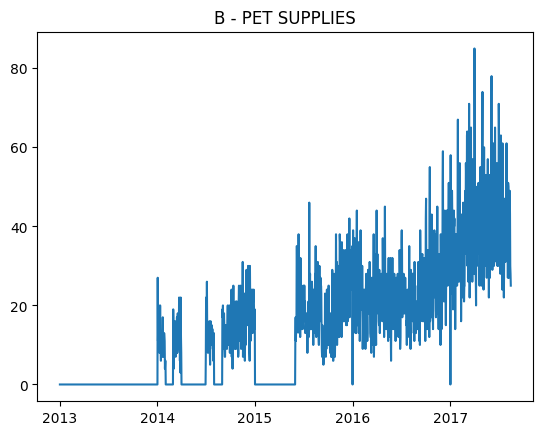

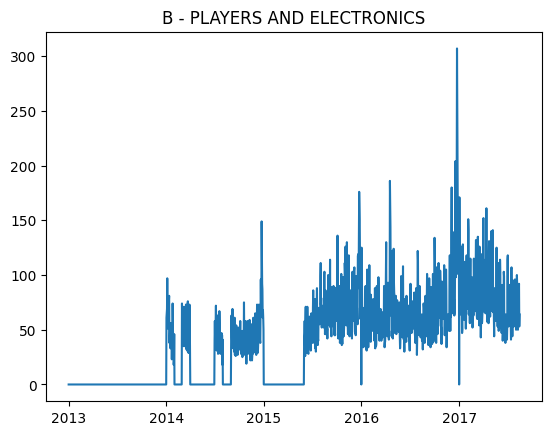

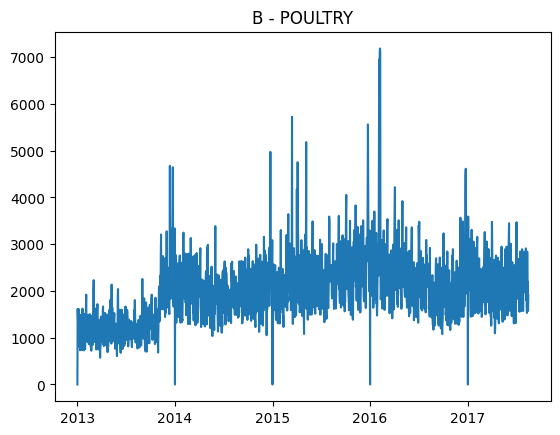

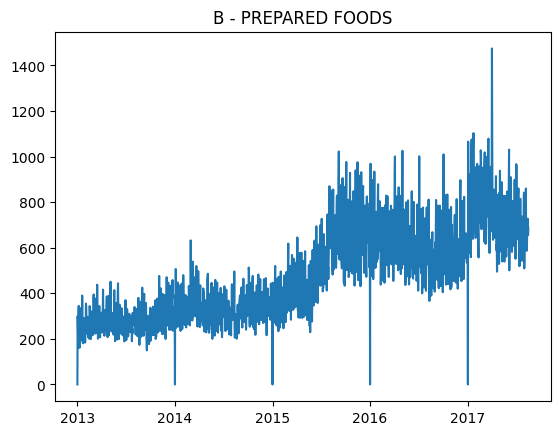

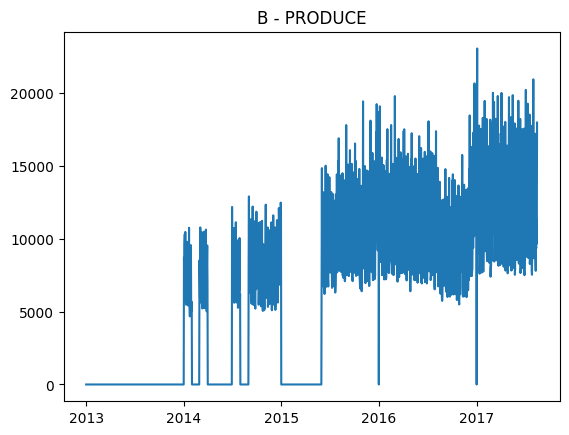

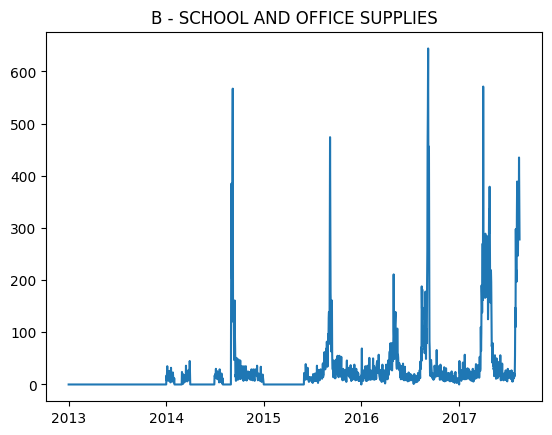

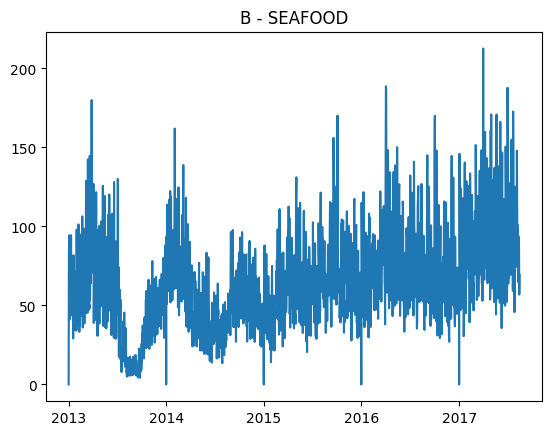

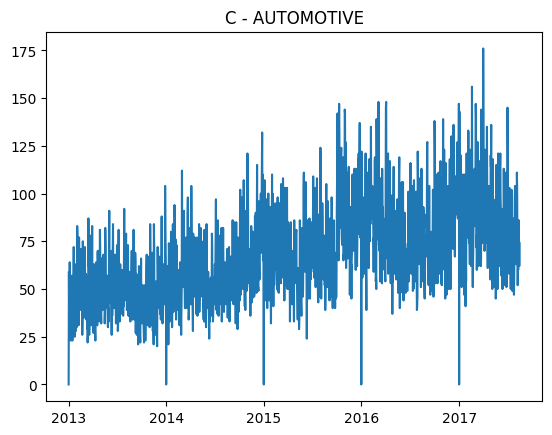

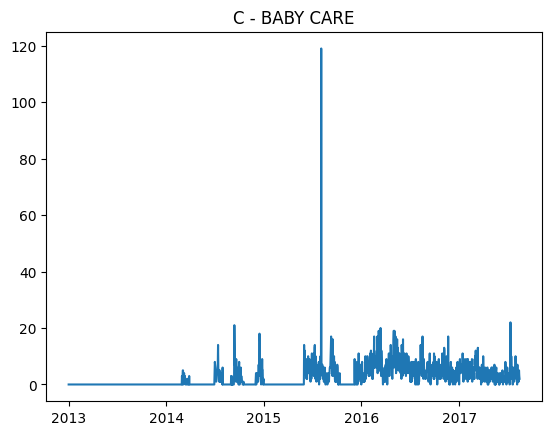

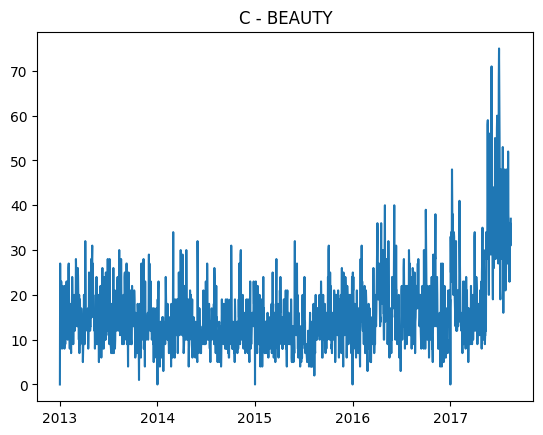

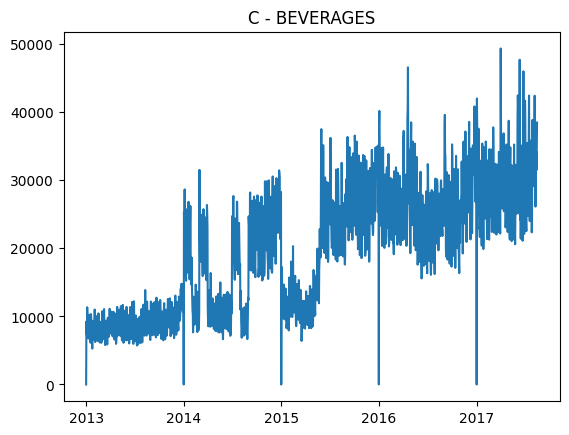

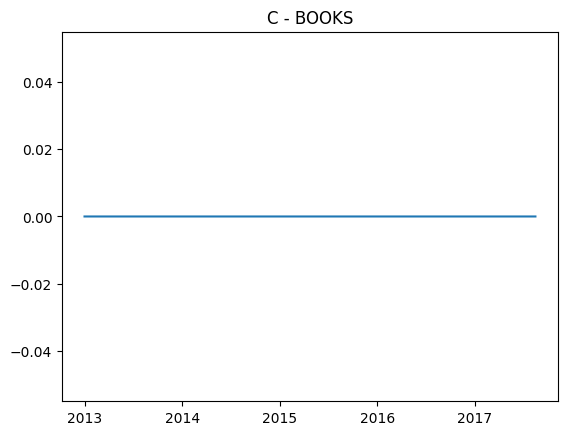

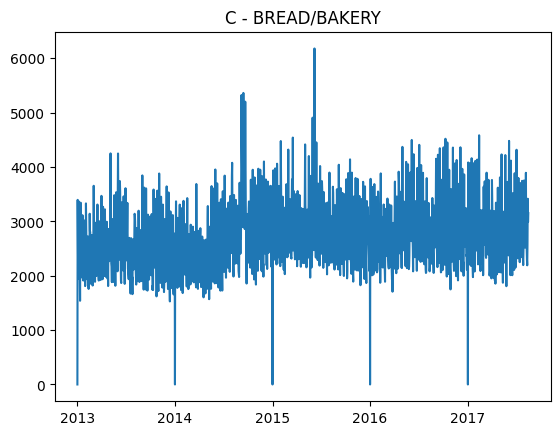

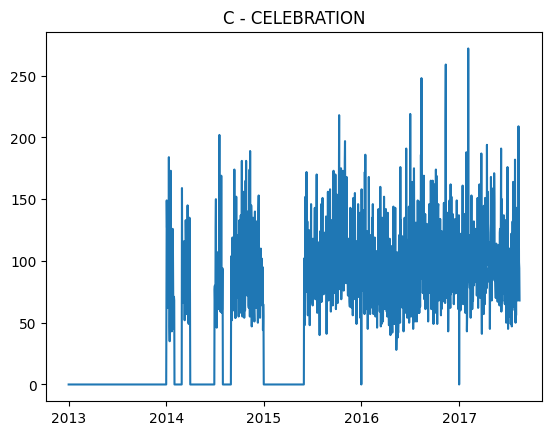

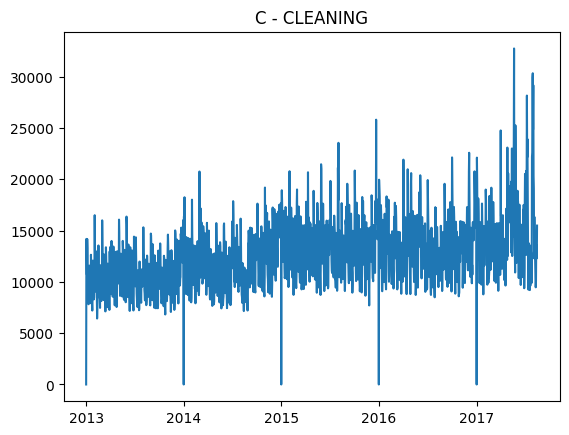

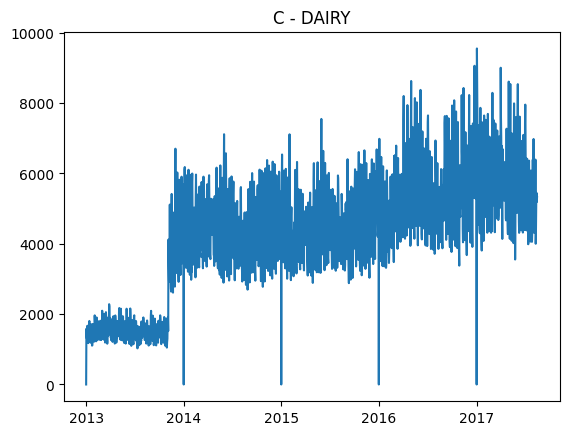

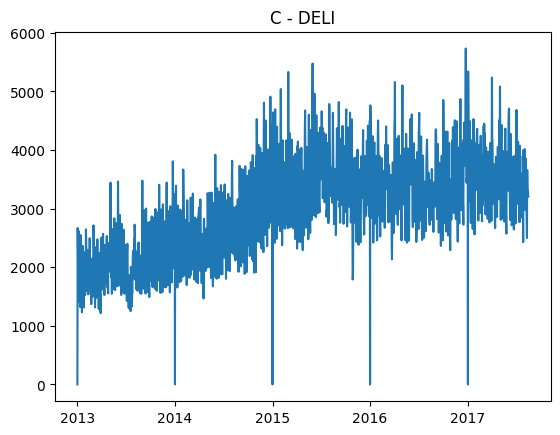

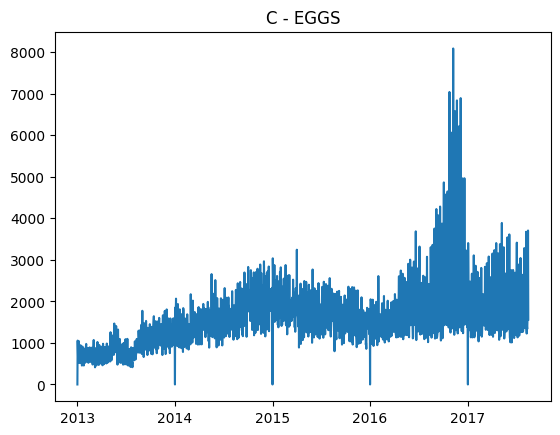

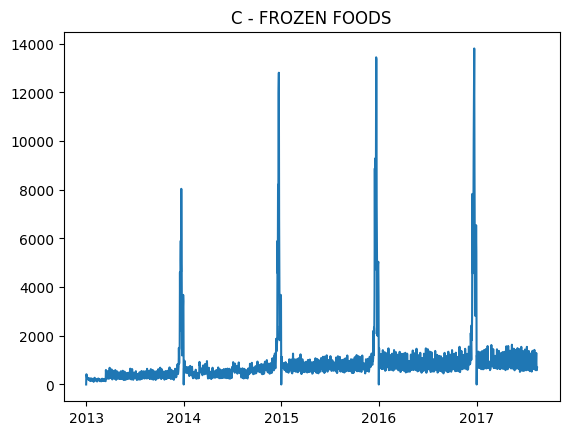

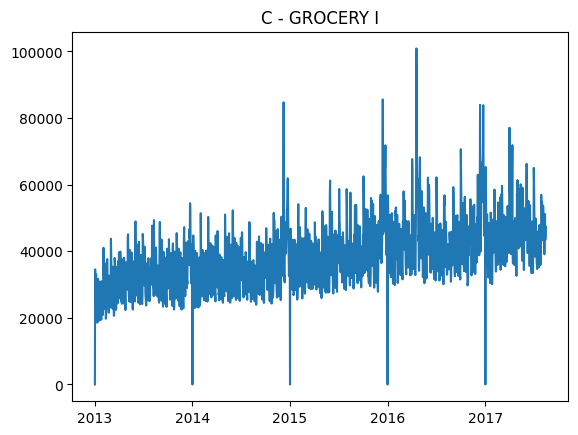

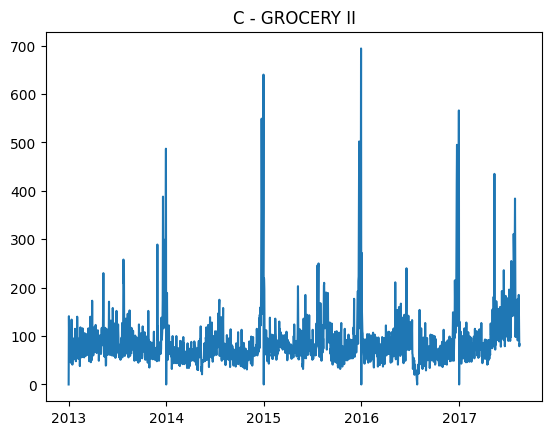

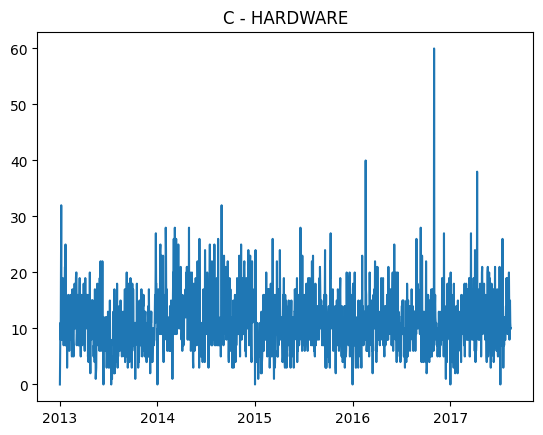

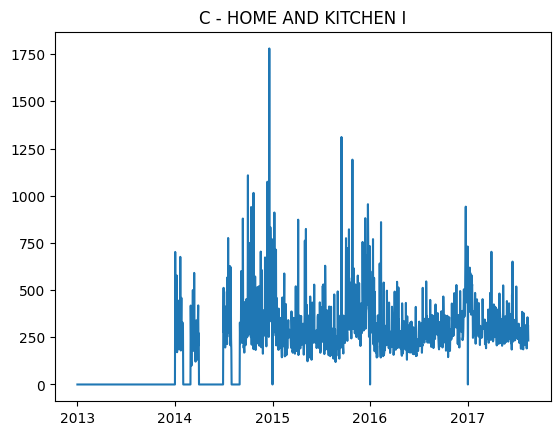

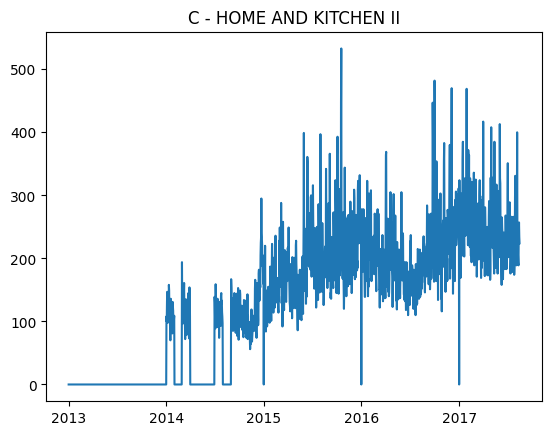

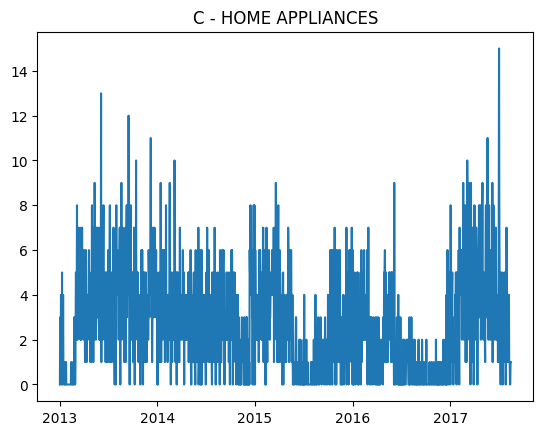

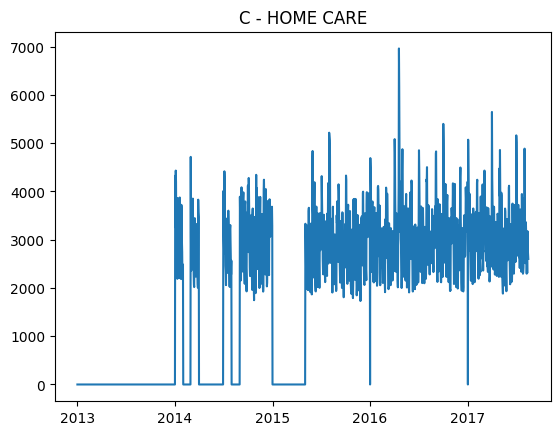

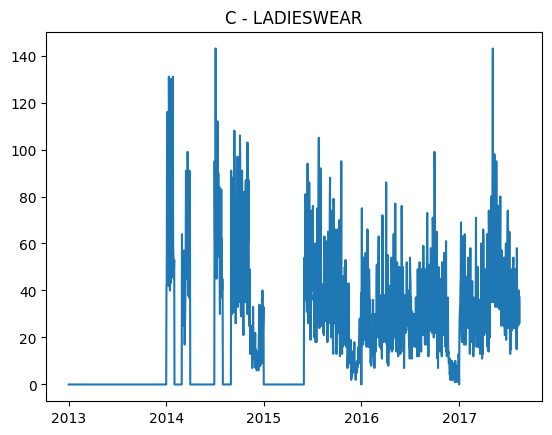

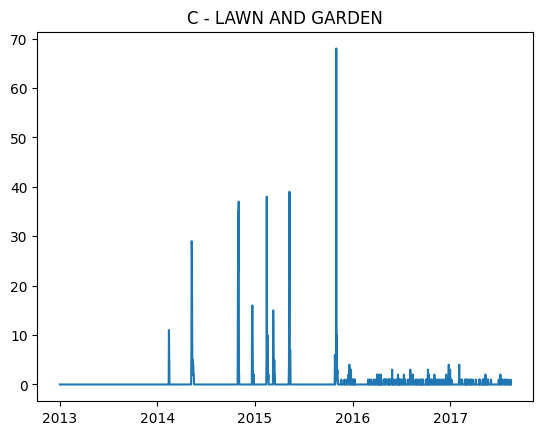

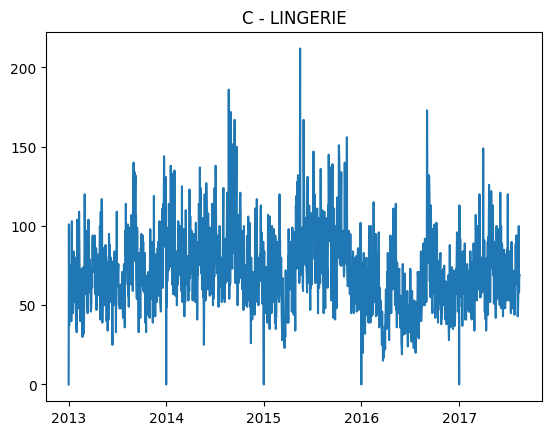

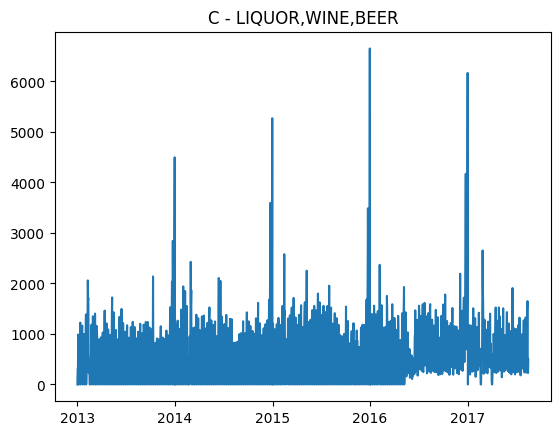

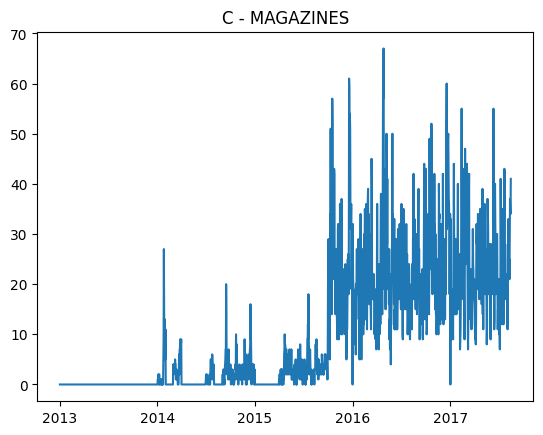

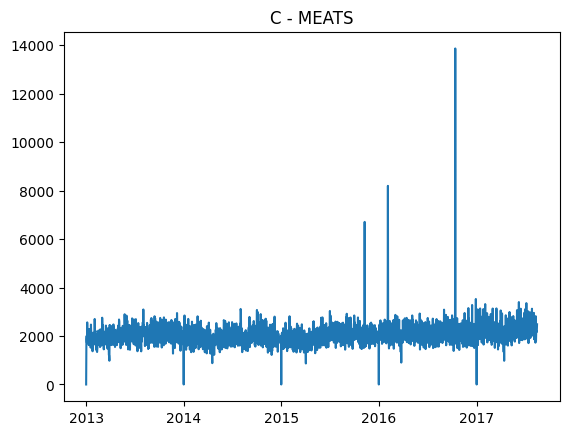

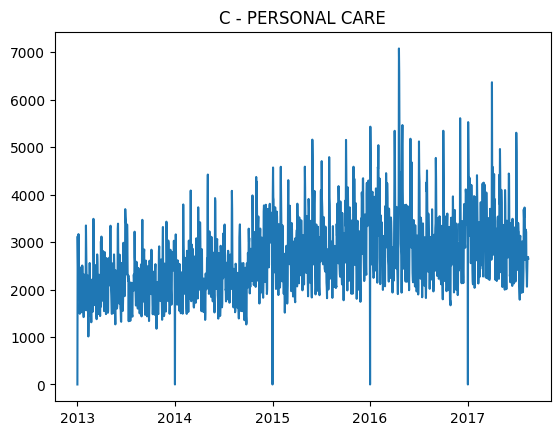

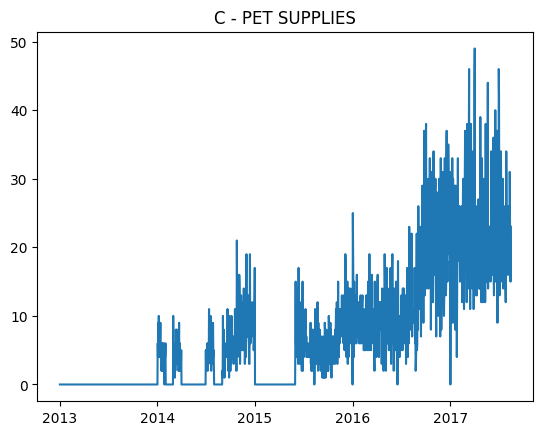

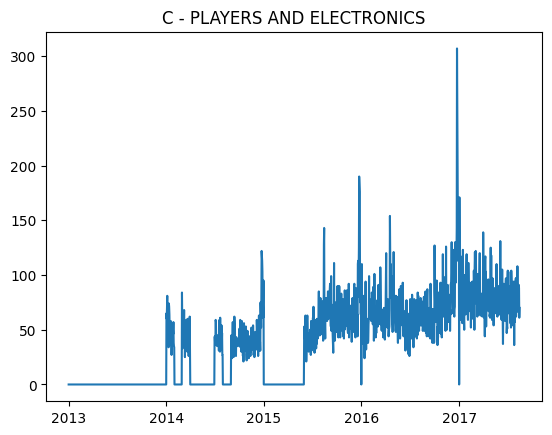

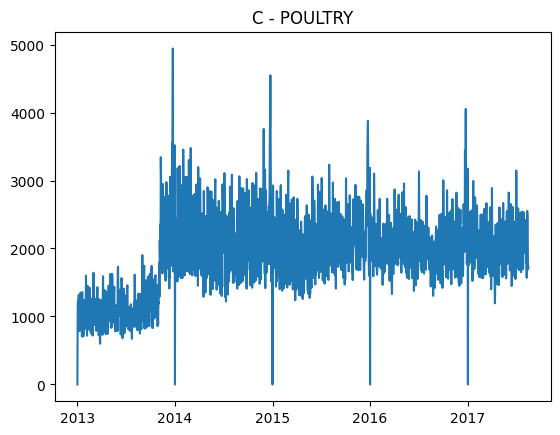

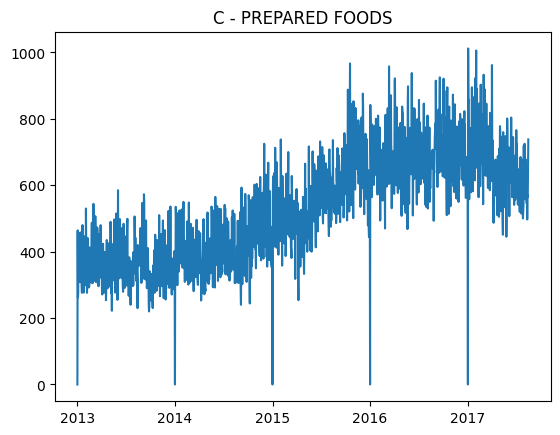

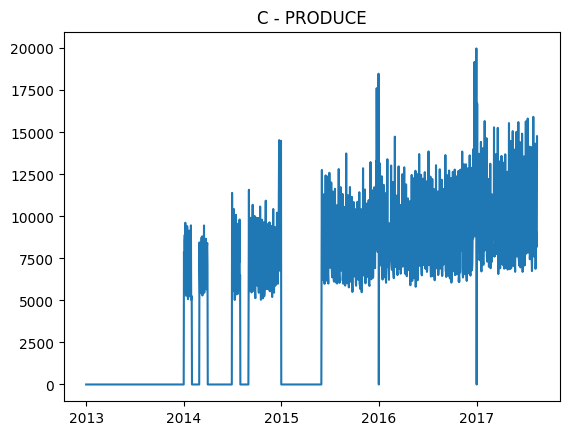

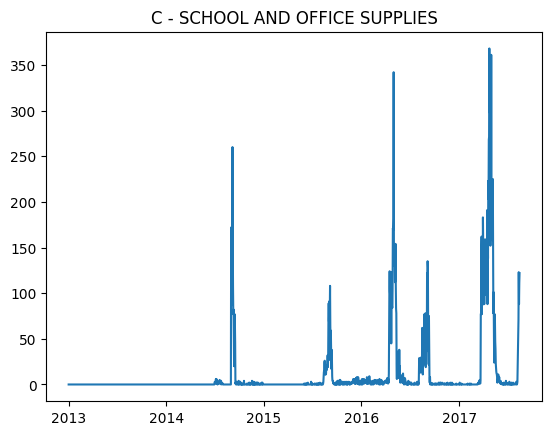

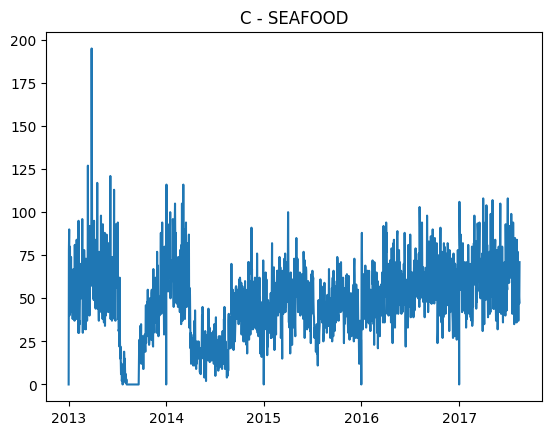

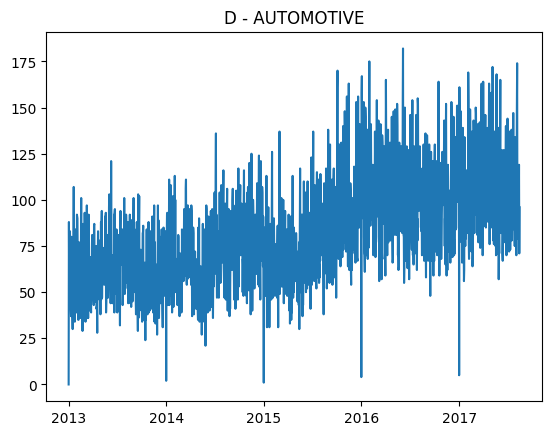

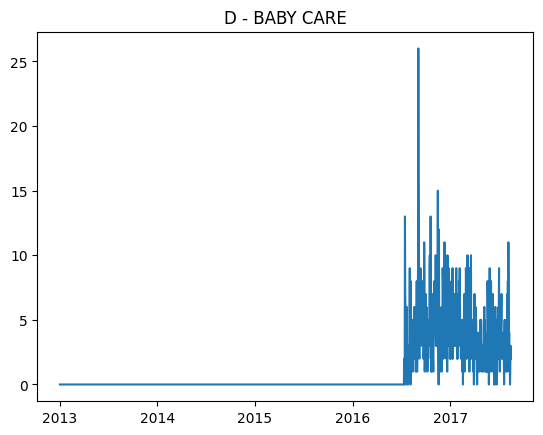

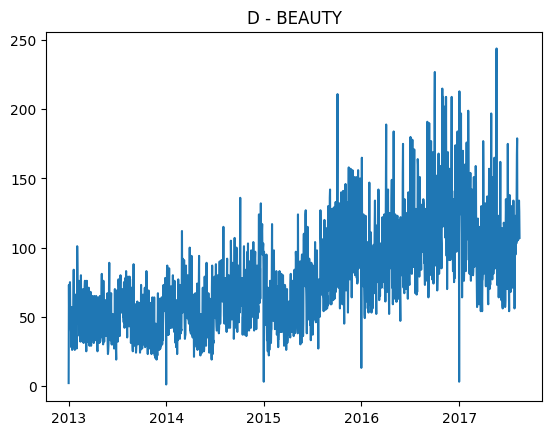

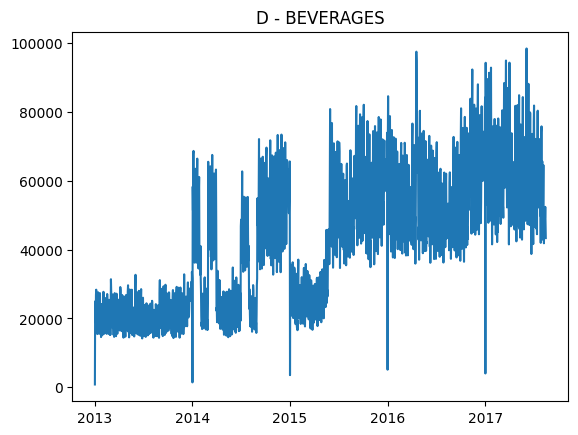

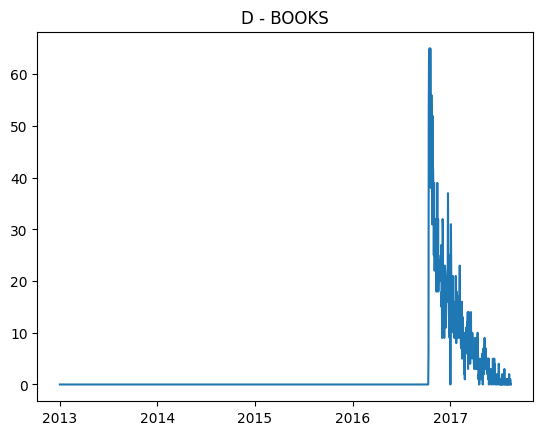

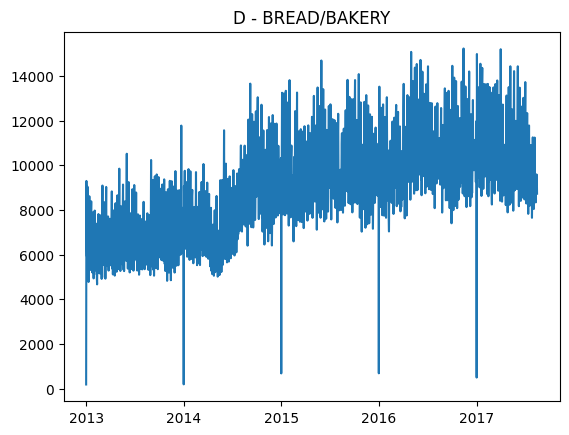

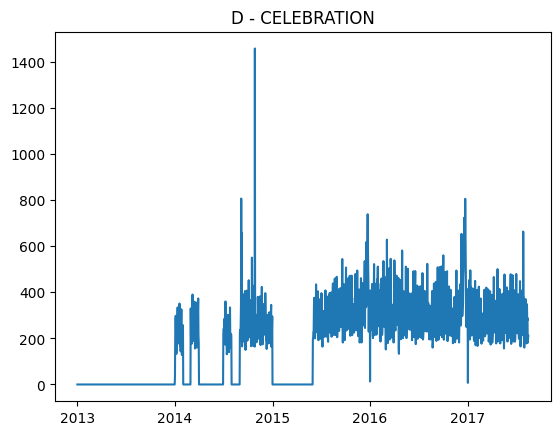

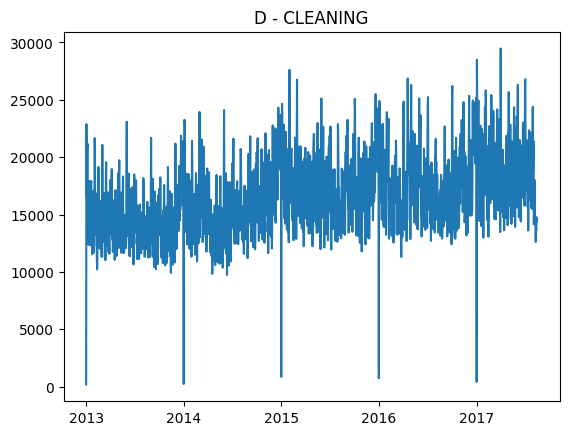

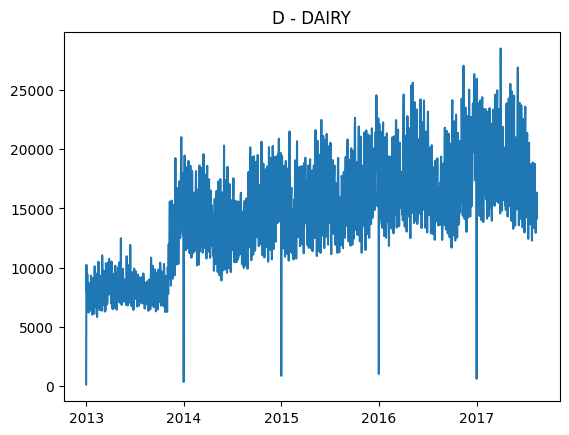

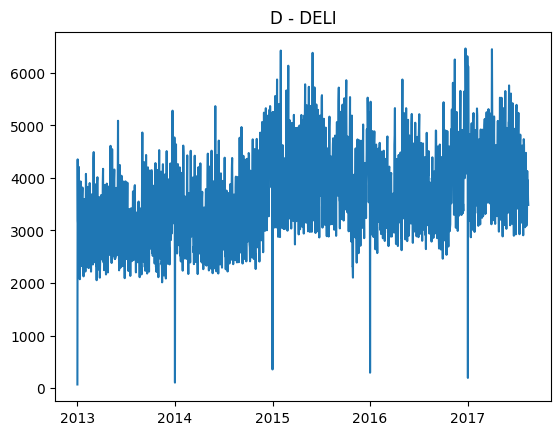

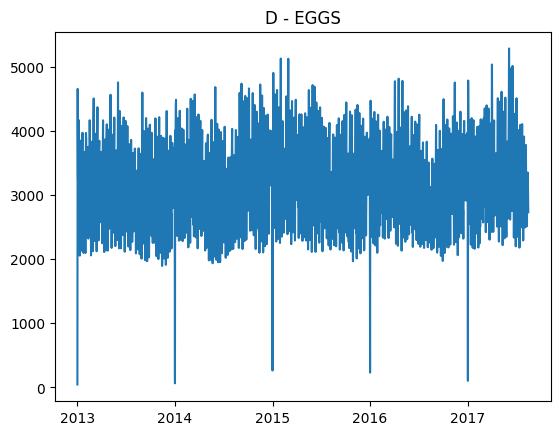

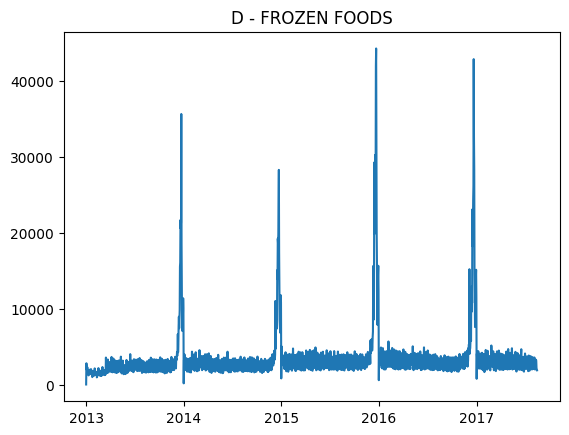

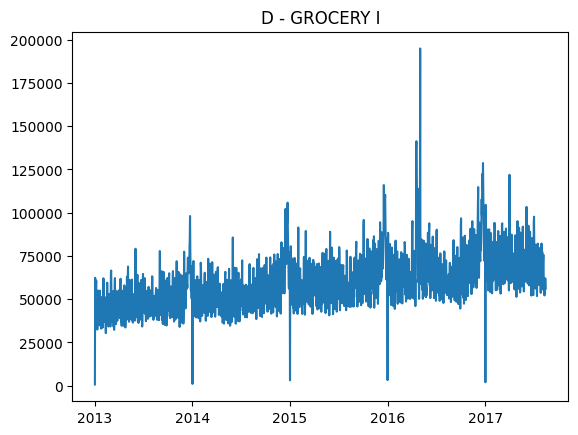

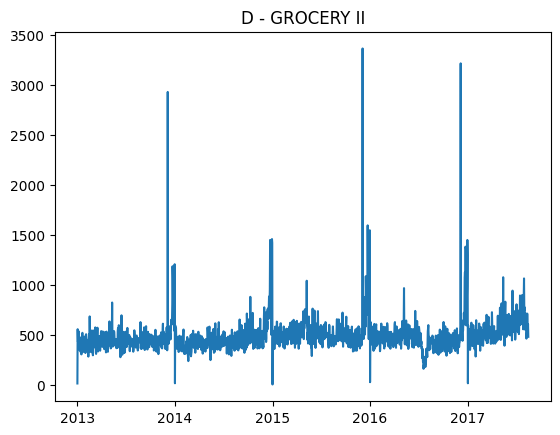

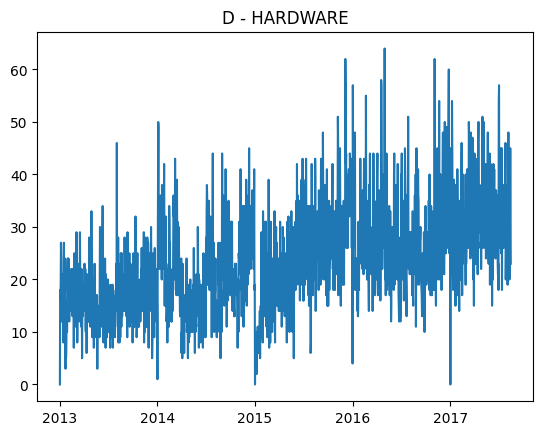

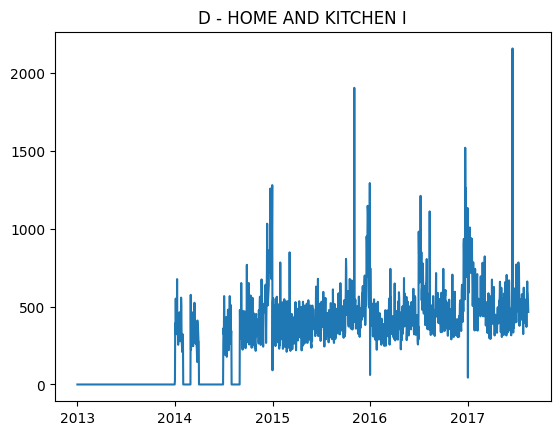

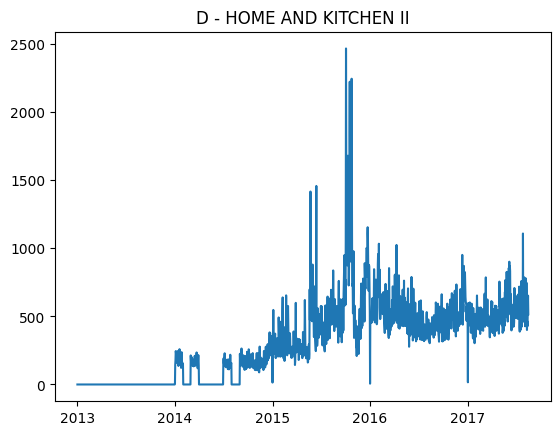

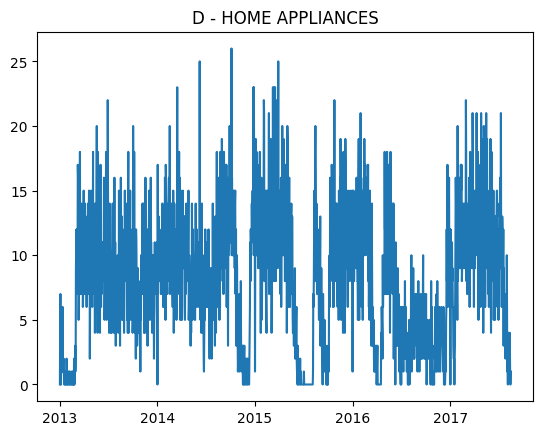

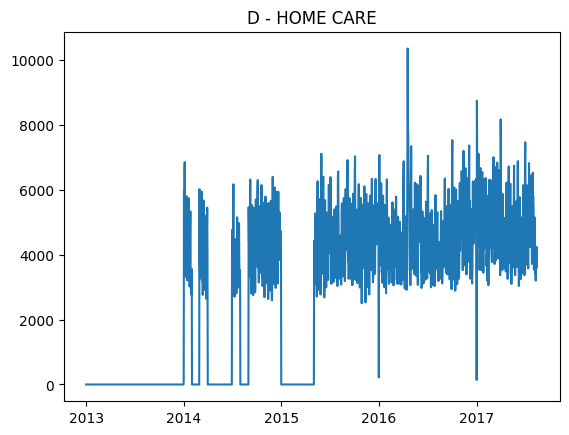

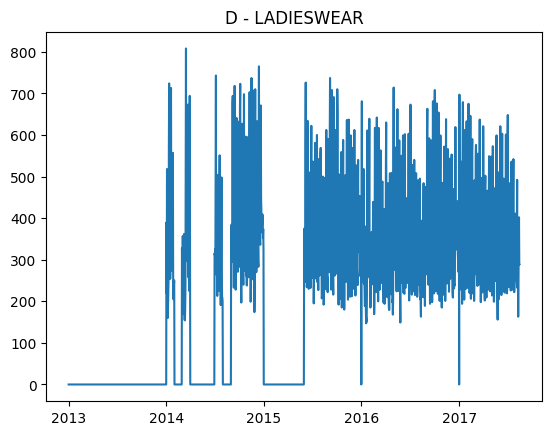

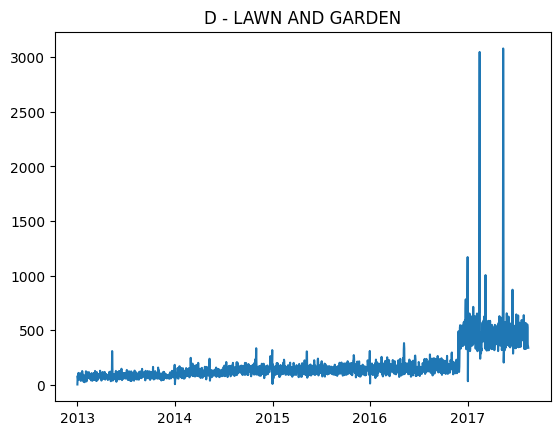

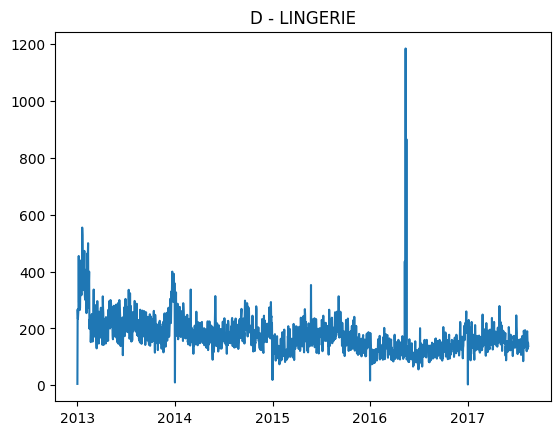

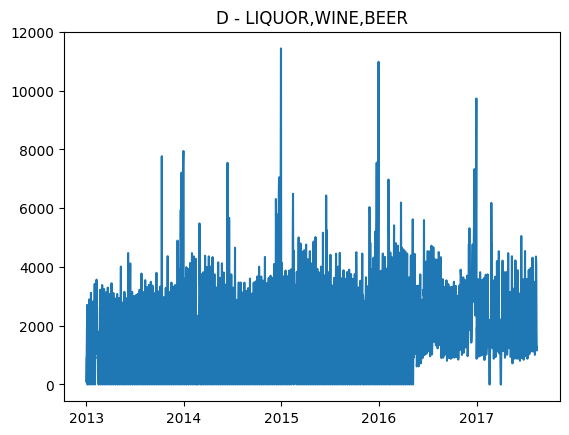

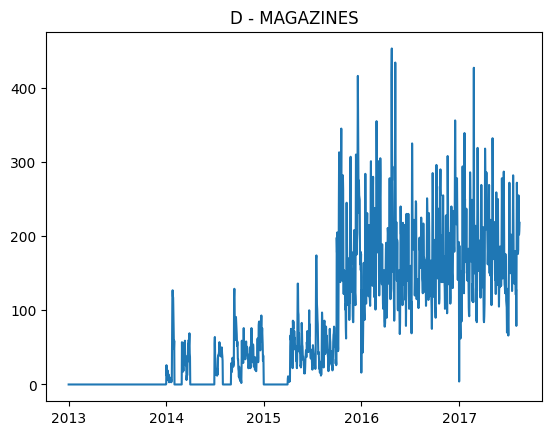

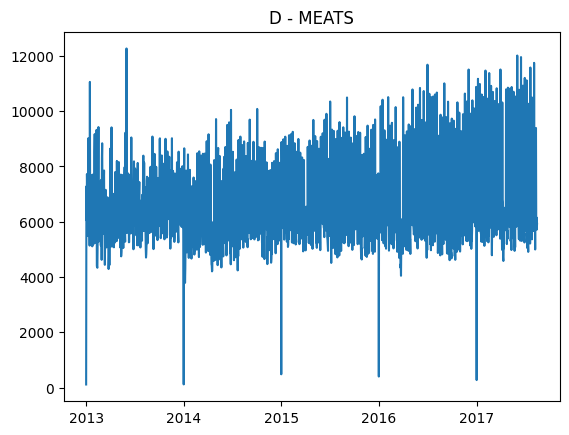

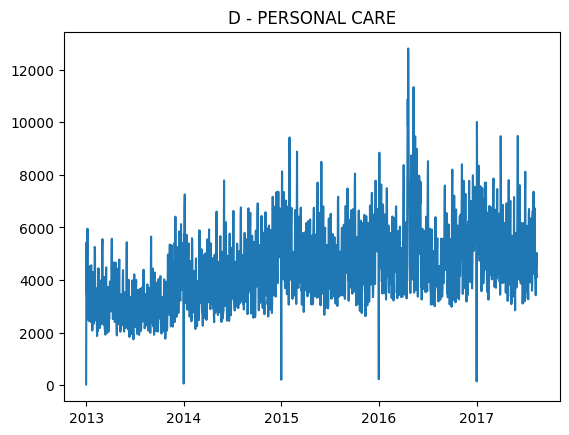

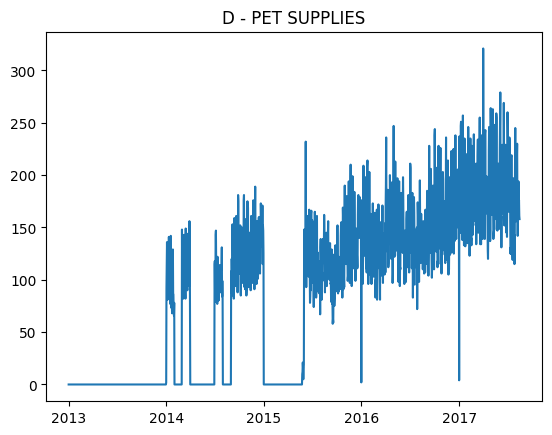

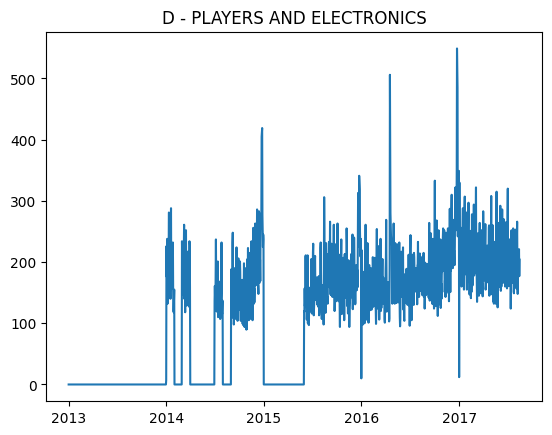

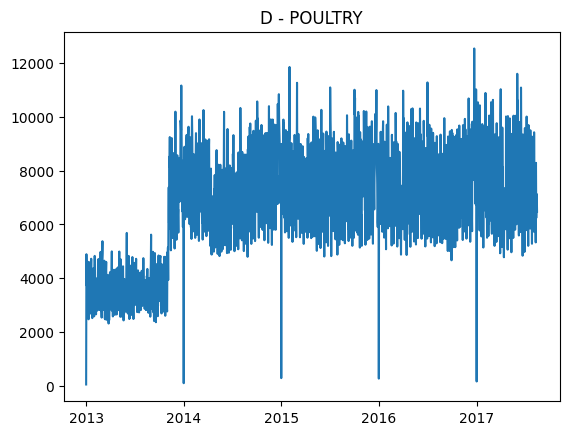

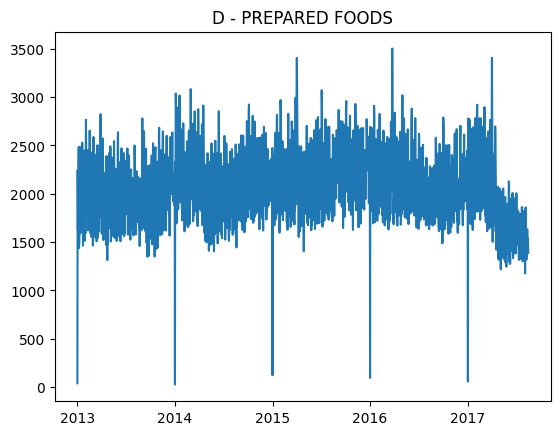

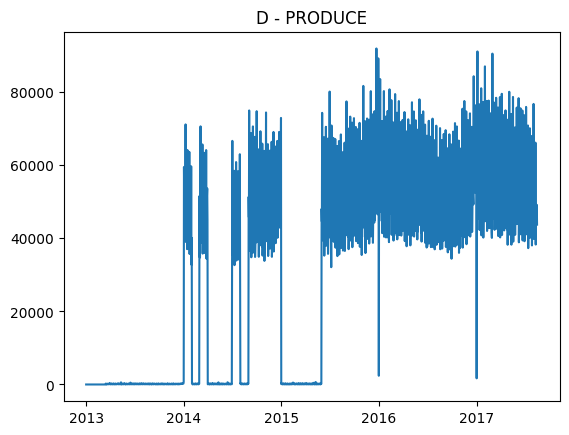

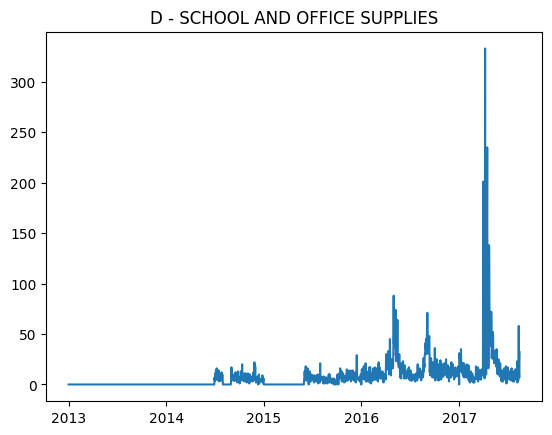

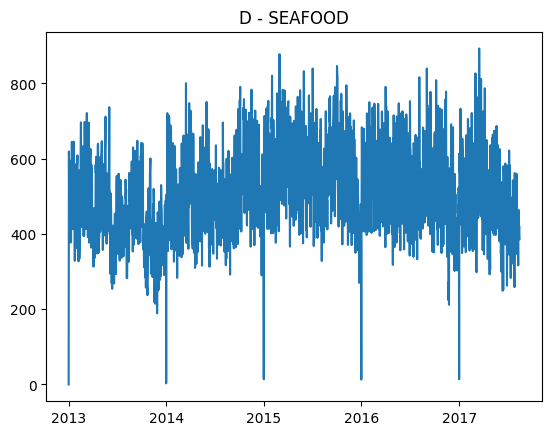

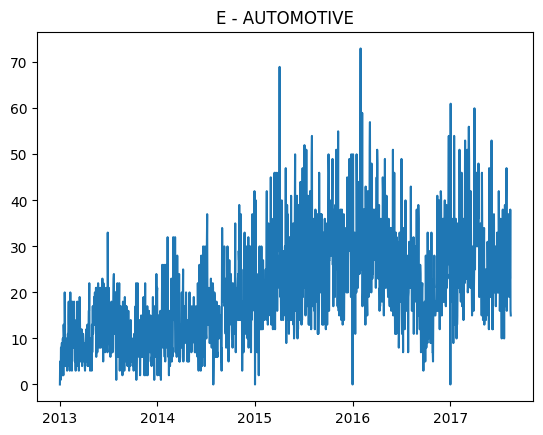

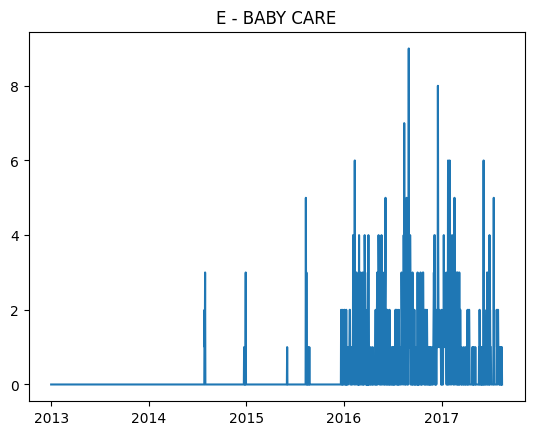

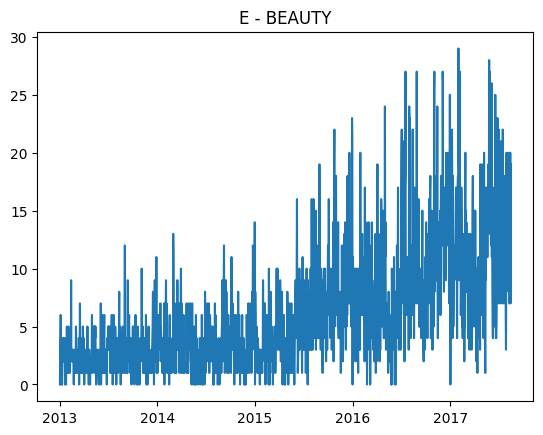

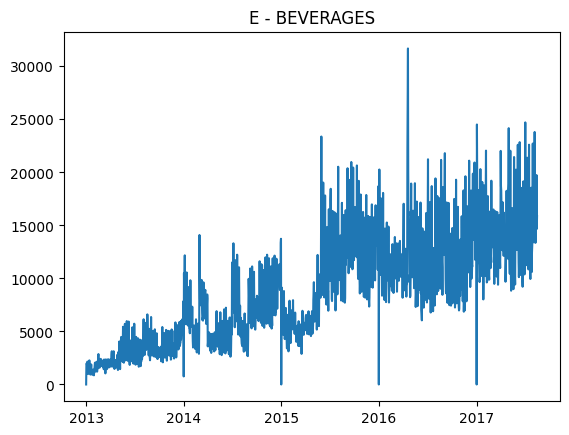

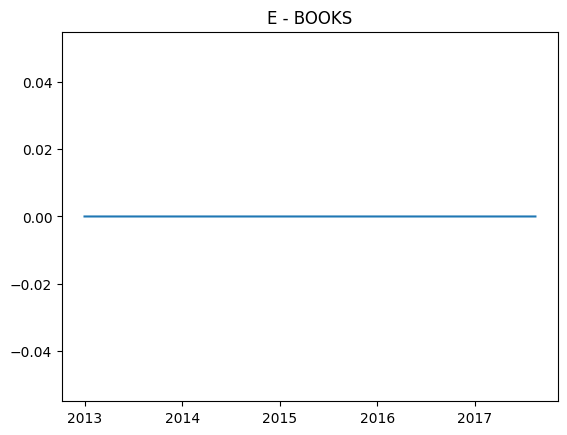

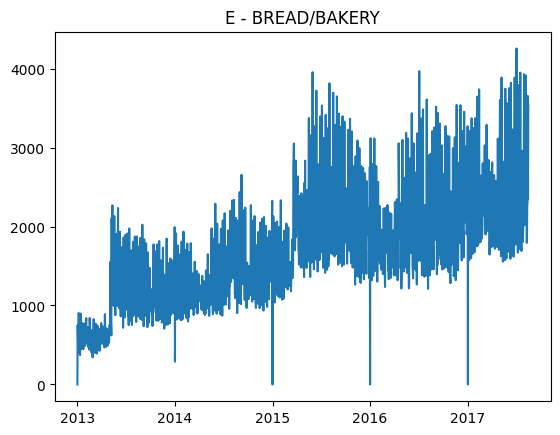

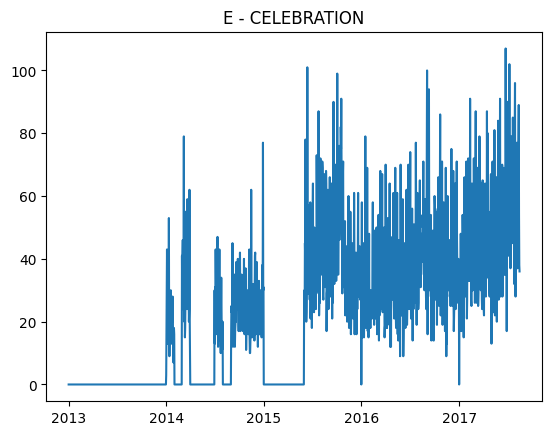

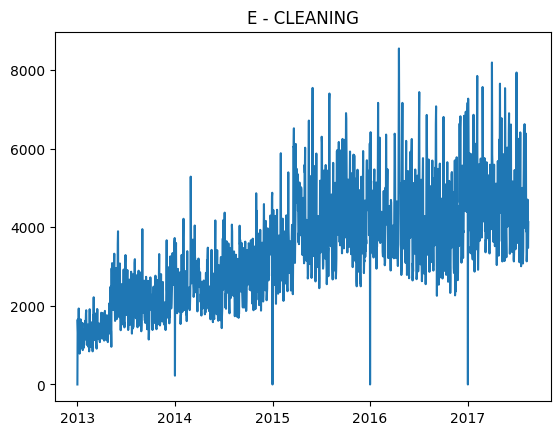

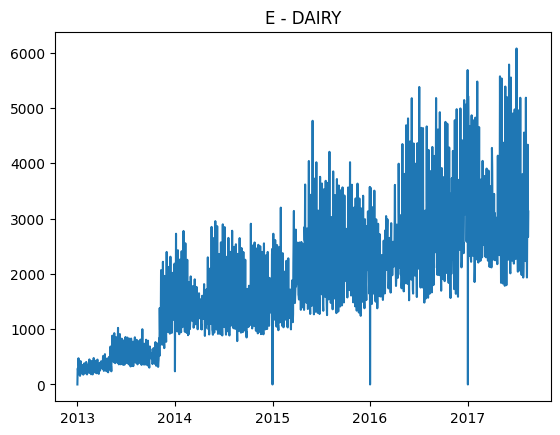

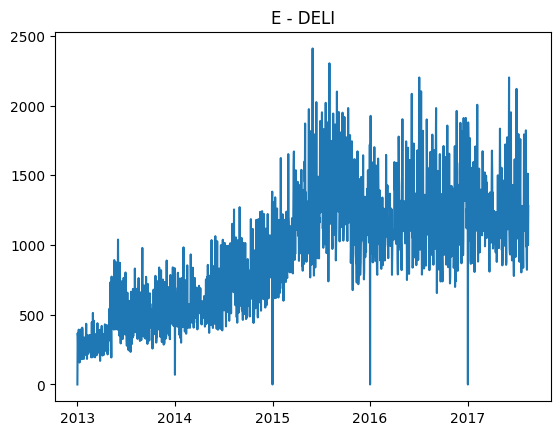

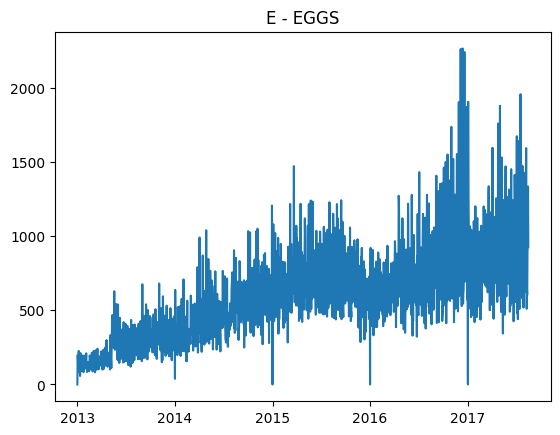

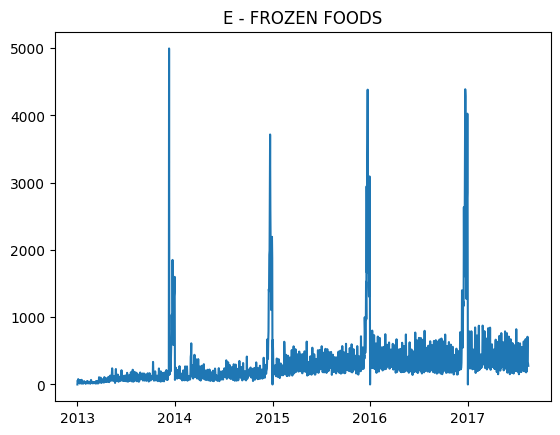

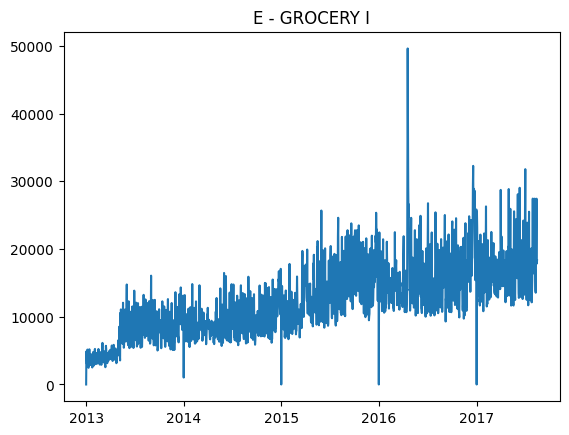

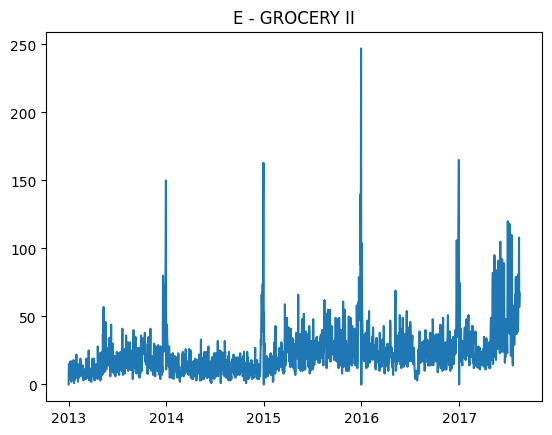

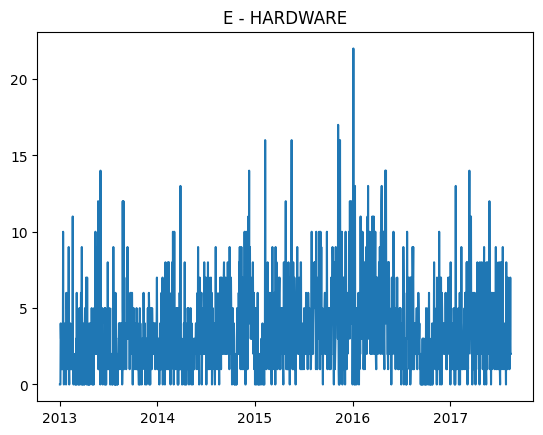

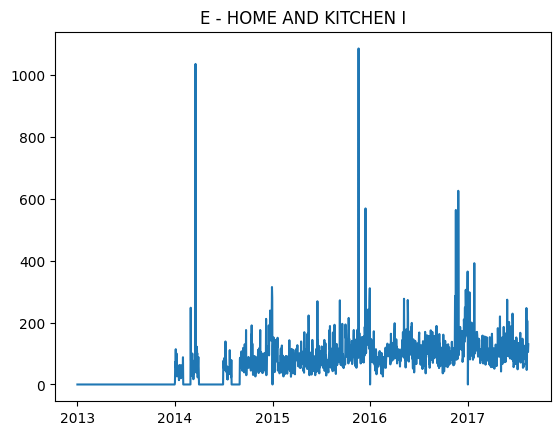

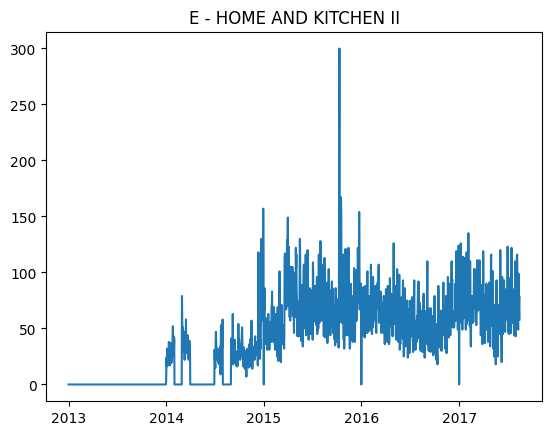

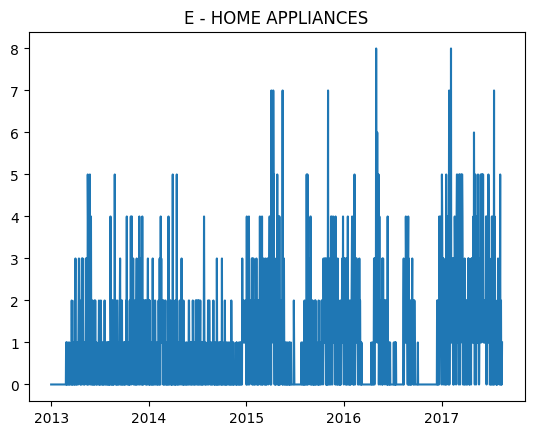

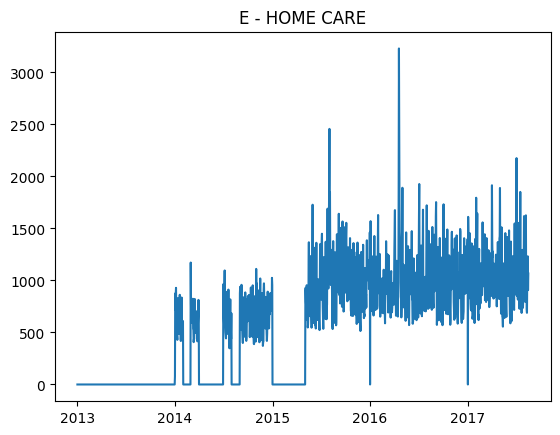

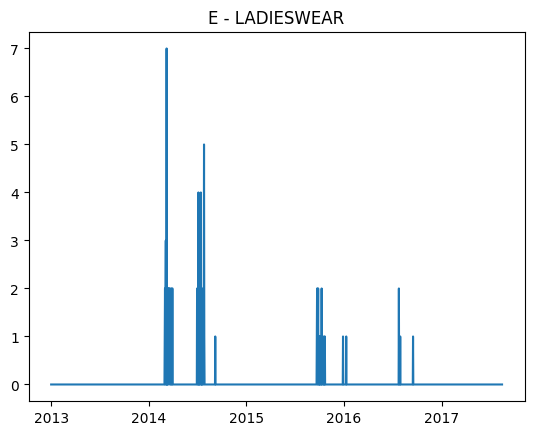

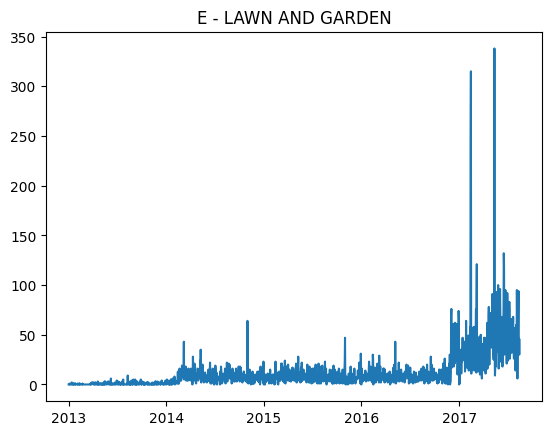

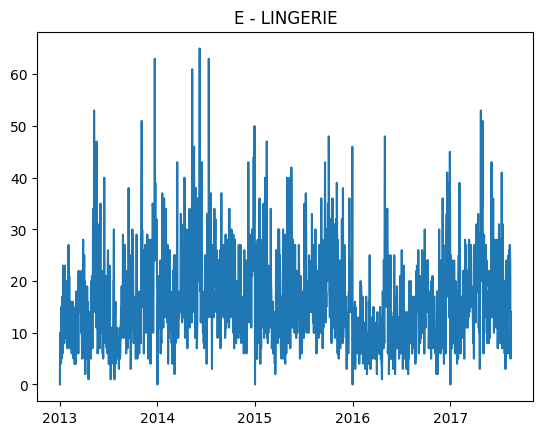

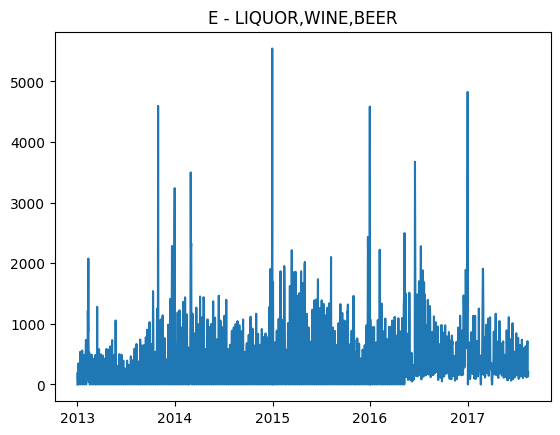

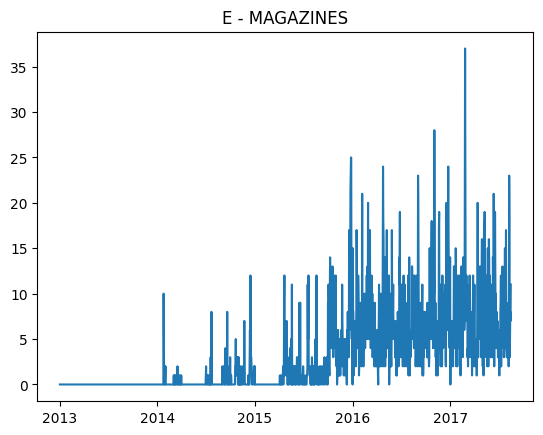

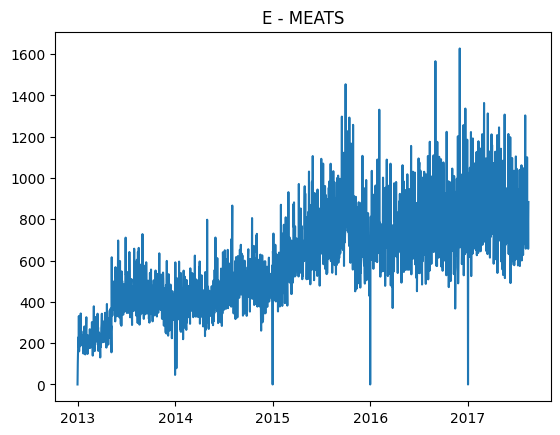

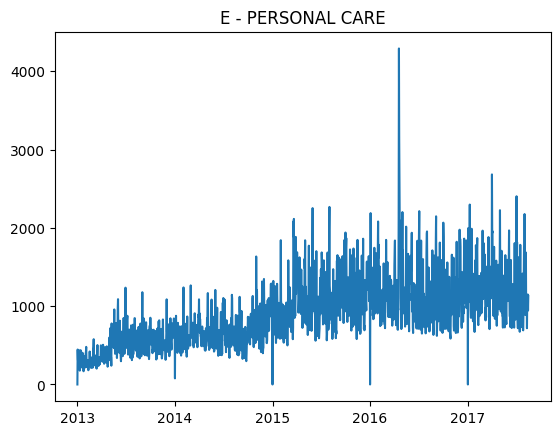

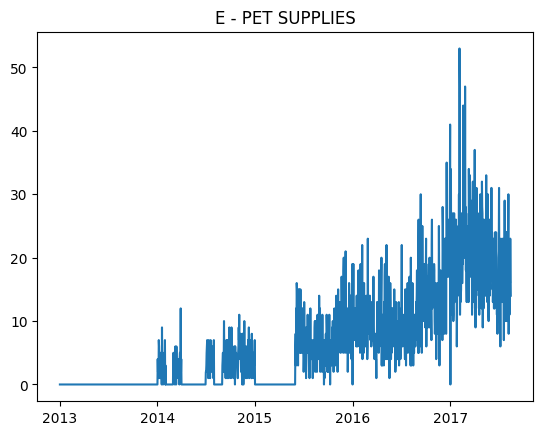

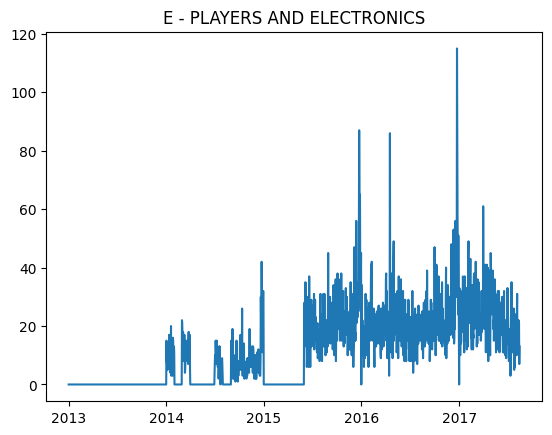

KeyboardInterrupt: 

In [56]:
for n,i in enumerate(store_grouped_type_family.index.unique()):
    plt.plot(store_grouped_type_family.date[store_grouped_type_family.index==i],store_grouped_type_family.sales[store_grouped_type_family.index==i])
    plt.title("{} - {}".format(store_grouped_type_family.index.unique()[n][0],store_grouped_type_family.index.unique()[n][1]))
    plt.show()

In [57]:
# melted_store_gtf = pd.melt(store_grouped_type_family, id_vars=store_grouped_type_family['sales'], value_vars=store_grouped_type_family['type'].unique(), ignore_index=False)

make correl;ation heat aps of each "family" oif propducts and store type(A-E),m determine that highly  correlated sales mens that we ca n group them together asabove or analysis

if it is no good, do the same for family of products grouped also by cluster, then city, etc

In [58]:
store_info.head()

store_nbr      family  sales  onpromotion   city      state type  \
date                                                                           
2013-01-01          1  AUTOMOTIVE    0.0            0  Quito  Pichincha    D   
2013-01-01          1   BABY CARE    0.0            0  Quito  Pichincha    D   
2013-01-01          1      BEAUTY    0.0            0  Quito  Pichincha    D   
2013-01-01          1   BEVERAGES    0.0            0  Quito  Pichincha    D   
2013-01-01          1       BOOKS    0.0            0  Quito  Pichincha    D   

            cluster  
date                 
2013-01-01       13  
2013-01-01       13  
2013-01-01       13  
2013-01-01       13  
2013-01-01       13

In [59]:
store_A_Auto = store_info[(store_info.type=="A") & (store_info.family=="AUTOMOTIVE")]
store_A_Auto

store_nbr      family  sales  onpromotion   city      state type  \
date                                                                           
2013-01-01         44  AUTOMOTIVE    0.0            0  Quito  Pichincha    A   
2013-01-02         44  AUTOMOTIVE   16.0            0  Quito  Pichincha    A   
2013-01-03         44  AUTOMOTIVE    7.0            0  Quito  Pichincha    A   
2013-01-04         44  AUTOMOTIVE   18.0            0  Quito  Pichincha    A   
2013-01-05         44  AUTOMOTIVE   26.0            0  Quito  Pichincha    A   
...               ...         ...    ...          ...    ...        ...  ...   
2017-08-11         52  AUTOMOTIVE   17.0            0  Manta     Manabi    A   
2017-08-12         52  AUTOMOTIVE   13.0            0  Manta     Manabi    A   
2017-08-13         52  AUTOMOTIVE   21.0            0  Manta     Manabi    A   
2017-08-14         52  AUTOMOTIVE    5.0            0  Manta     Manabi    A   
2017-08-15         52  AUTOMOTIVE    2.0            0  Manta     Manabi    A   

            cluster  
date                 
2013-01-01        5  
2013-01-02        5  
2013-01-03        5  
2013-01-04        5  
2013-01-05        5  
...             ...  
2017-08-11       11  
2017-08-12       11  
2017-08-13       11  
2017-08-14       11  
2017-08-15       11  

[15156 rows x 8 columns]

In [60]:
store_A_Auto_us = pd.pivot_table(store_A_Auto, values='sales', index=store_A_Auto.index, columns=['store_nbr'])
store_A_Auto_us

store_nbr     44    45    46    47    48    49    50    51    52
date                                                            
2013-01-01   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
2013-01-02  16.0  13.0  11.0  11.0   5.0   5.0   7.0   4.0   0.0
2013-01-03   7.0   3.0   7.0   6.0   3.0   1.0   4.0   2.0   0.0
2013-01-04  18.0   7.0   2.0   4.0   1.0   5.0   5.0   3.0   0.0
2013-01-05  26.0  37.0  12.0  17.0   6.0   6.0  23.0   9.0   0.0
...          ...   ...   ...   ...   ...   ...   ...   ...   ...
2017-08-11  25.0  19.0  18.0  21.0  14.0  23.0  14.0   6.0  17.0
2017-08-12  12.0  22.0  16.0  23.0  19.0   8.0  14.0   7.0  13.0
2017-08-13  20.0  27.0  20.0  27.0  23.0  14.0  19.0   6.0  21.0
2017-08-14  10.0  15.0   9.0  20.0  11.0   4.0   6.0   8.0   5.0
2017-08-15  15.0  11.0  19.0   5.0   6.0  11.0  11.0  11.0   2.0

[1684 rows x 9 columns]

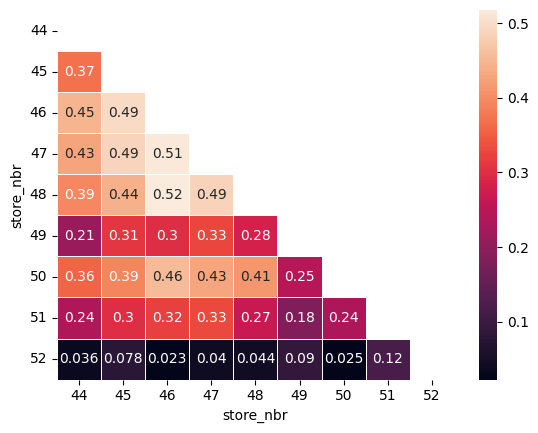

In [61]:
corr_A_Auto = store_A_Auto_us.corr()
matrix = np.triu(corr_A_Auto)


sns.heatmap(corr_A_Auto, annot=True, linewidths=0.4, annot_kws={"size": 10}, mask=matrix)

plt.xticks(rotation=0)
plt.yticks(rotation=0) 
plt.show()

In [62]:
matrix.mean().mean()

0.2423820545378338

In [63]:
corr_A_Auto.mean().mean()

0.3736529979645565

In [64]:
store_info_csv = train_csv.merge(stores,on=['store_nbr']).set_index('date')

In [65]:
def hm(df, target_column, index_column, grouping_column, drop_columns):
    
    if drop_columns != None:
        df1 = df.drop(columns=drop_columns)
    else:
        df1 = df
    
    print(df1.loc[:, ~df1.columns.isin([target_column,grouping_column])].columns)


    
    """
    df2 = df1[(df.type=="A") & (df1.family=="AUTOMOTIVE")]

    df3 = pd.pivot_table(df2, values=target_column, index=df2.index, columns=[grouping_column])

    df4 = df3.corr()

    sns.heatmap(df4, annot=True, linewidths=0.4, annot_kws={"size": 10})
    plt.title("A" + " - " + "AUTOMOTIVE")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0) 
    plt.show()
    
    """

In [66]:
def hm2(df, target_column, index_column, compare_column, grouping_column, drop_columns):
    
    if drop_columns != None:
        df1 = df.drop(columns=drop_columns)
    else:
        df1 = df
    
    try_columns = df1.loc[:, ~df1.columns.isin([target_column,grouping_column,compare_column])].columns


    for i in try_columns:
        for j in df1[i].unique():
            for n in df1[grouping_column].unique():

                df2 = df1[(df1[i]==j) & (df1[grouping_column] == n)]

                df3 = pd.pivot_table(df2, values=target_column, index=df2.index, columns=[compare_column])

                df4 = df3.corr()

                sns.heatmap(df4, annot=True, linewidths=0.4, annot_kws={"size": 10})
                plt.title(j + " - " + n)
                plt.xticks(rotation=90)
                plt.yticks(rotation=0) 
                plt.show()



In [67]:
def hm3(df, target_column, index_column, compare_column, grouping_column, drop_columns):
    
    c = ['crimson', 'gold', 'lime', 'gold', 'crimson']
    my_cmap = ListedColormap(c)
    bounds = [-1.0,-0.66,-0.33,0.33,0.66,1.0]
    my_norm = BoundaryNorm(bounds, ncolors=len(c))

    if drop_columns != None:
        df1 = df.drop(columns=drop_columns)
    else:
        df1 = df
    
    try_columns = df1.loc[:, ~df1.columns.isin([target_column,grouping_column,compare_column])].columns

    for n in df1[grouping_column].unique():
        for i in try_columns:
            for j in df1[i].unique():
            

                df2 = df1[(df1[i]==j) & (df1[grouping_column] == n)]

                df3 = pd.pivot_table(df2, values=target_column, index=df2.index, columns=[compare_column])

                df4 = df3.corr()

                sns.heatmap(df4, annot=False, linewidths=0.4,vmin=-1, vmax=1,cmap=my_cmap, norm=my_norm)
                plt.title("{} : {} - {}".format(i,j,n))
                plt.xticks(rotation=90)
                plt.yticks(rotation=0) 
                plt.show()


In [68]:
def hm4(df, target_column, index_column, compare_column, grouping_column, drop_columns):
    
    c = ['crimson', 'gold', 'lime', 'gold', 'crimson']
    my_cmap = ListedColormap(c)
    bounds = [-1.0,-0.66,-0.33,0.33,0.66,1.0]
    my_norm = BoundaryNorm(bounds, ncolors=len(c))

    if drop_columns != None:
        df1 = df.drop(columns=drop_columns)
    else:
        df1 = df
    
    try_columns = df1.loc[:, ~df1.columns.isin([target_column,grouping_column,compare_column])].columns

    for n in df1[grouping_column].unique():
        for i in try_columns:
            for j in df1[i].unique():
            

                df2 = df1[(df1[i]==j) & (df1[grouping_column] == n)]

                df3 = pd.pivot_table(df2, values=target_column, index=df2.index, columns=[compare_column])

                df4 = df3.corr()
                df_mean = df4.mean().mean()
                
                print("{} : {} - {} = {}".format(i,j,n,df_mean))


In [71]:
def hm5(df, target_column, index_column, compare_column, grouping_column, drop_columns):
    
    output = []
    c = ['crimson', 'gold', 'lime', 'gold', 'crimson']
    my_cmap = ListedColormap(c)
    bounds = [-1.0,-0.66,-0.33,0.33,0.66,1.0]
    my_norm = BoundaryNorm(bounds, ncolors=len(c))

    if drop_columns != None:
        df1 = df.drop(columns=drop_columns)
    else:
        df1 = df
    
    try_columns = df1.loc[:, ~df1.columns.isin([target_column,grouping_column,compare_column])].columns

    for i in try_columns:
        for j in df1[i].unique():
            for n in df1[grouping_column].unique():

                df2 = df1[(df1[i]==j) & (df1[grouping_column] == n)]

                df3 = pd.pivot_table(df2, values=target_column, index=df2.index, columns=[compare_column])

                df4 = np.triu(df3.corr())
                df_mean = df4.mean().mean()
                output.append((i,j,n,df_mean))
    
    output_df = pd.DataFrame(output, columns=["category_type","category","family","correlation_mean"])
    return output_df    


In [72]:
output_df = hm5(store_info_csv,target_column='sales',index_column='date',compare_column='store_nbr',grouping_column='family',drop_columns=['id','onpromotion'])
output_df

category_type category                      family  correlation_mean
0             city    Quito                  AUTOMOTIVE          0.142868
1             city    Quito                   BABY CARE               NaN
2             city    Quito                      BEAUTY          0.237320
3             city    Quito                   BEVERAGES          0.438136
4             city    Quito                       BOOKS               NaN
...            ...      ...                         ...               ...
1975       cluster       17                     POULTRY          1.000000
1976       cluster       17              PREPARED FOODS          1.000000
1977       cluster       17                     PRODUCE          1.000000
1978       cluster       17  SCHOOL AND OFFICE SUPPLIES          1.000000
1979       cluster       17                     SEAFOOD          1.000000

[1980 rows x 4 columns]

In [79]:
sort_out = output_df[output_df['correlation_mean']!=1].sort_values('correlation_mean',ascending=False)
sort_out.head(20)

category_type    category        family  correlation_mean
1086         state    Los Rios       PRODUCE          0.741876
987          state  Tungurahua       PRODUCE          0.739724
294           city      Ambato       PRODUCE          0.739724
1668       cluster           9     HOME CARE          0.737725
1680       cluster           9       PRODUCE          0.737232
789          state    Cotopaxi       PRODUCE          0.736903
96            city   Latacunga       PRODUCE          0.736903
282           city      Ambato     HOME CARE          0.733911
975          state  Tungurahua     HOME CARE          0.733911
1074         state    Los Rios     HOME CARE          0.730651
1653       cluster           9     BEVERAGES          0.728427
267           city      Ambato     BEVERAGES          0.727848
960          state  Tungurahua     BEVERAGES          0.727848
84            city   Latacunga     HOME CARE          0.724033
777          state    Cotopaxi     HOME CARE          0.724033
1064         state    Los Rios         DAIRY          0.721098
605           city     Machala  FROZEN FOODS          0.720465
1166         state      El Oro  FROZEN FOODS          0.720465
612           city     Machala     HOME CARE          0.720396
1173         state      El Oro     HOME CARE          0.720396

List all Category Type and Category combinations, with associated correlation means (excluding those combos which only had one store (meaning that the correlation was 1.0))

In [83]:
group_out = output_df.groupby(['category_type','category']).agg('mean')
group_out_multi = group_out[group_out['correlation_mean']!=1]
group_out_multi

C:\Users\Joseph Shire\AppData\Local\Temp\ipykernel_14828\656207091.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_out = output_df.groupby(['category_type','category']).agg('mean')


correlation_mean
category_type category                                        
city          Ambato                                  0.630186
              Cuenca                                  0.446649
              Guayaquil                               0.282340
              Latacunga                               0.596215
              Machala                                 0.609402
              Manta                                   0.548241
              Quito                                   0.297922
              Santo Domingo                           0.417340
cluster       1                                       0.444799
              2                                       0.558067
              3                                       0.307627
              4                                       0.506582
              6                                       0.348505
              7                                       0.565320
              8                                       0.528010
              9                                       0.625708
              10                                      0.342436
              11                                      0.449861
              13                                      0.387665
              14                                      0.524676
              15                                      0.367842
state         Azuay                                   0.446649
              Cotopaxi                                0.596215
              El Oro                                  0.609402
              Guayas                                  0.261487
              Los Rios                                0.627646
              Manabi                                  0.416263
              Pichincha                               0.293655
              Santo Domingo de los Tsachilas          0.417340
              Tungurahua                              0.630186
type          A                                       0.357611
              B                                       0.310906
              C                                       0.238152
              D                                       0.255671
              E                                       0.422057

One last averaging to determine the best way to group these stores, using the Category Type to collapse down all sub-categories within.

In [84]:
final_grouping = group_out_multi.groupby('category_type').agg('mean')
final_grouping

correlation_mean
category_type                  
city                   0.478537
cluster                0.458238
state                  0.477649
type                   0.316879

By a thin margain, "City" appears to be the best option for grouping, based on it having the highest correlation mean of the 4 category types. This is also the most intuative solution, due to individual cities serving similar clientele. The needs of a local, centralized populace (compared to larger states or the diasporateness of clusters or types) will be more homogenous. Further, it would be reasonable to theorize that people with similar needs and similar available stores will shop at the most convenient location (close to home or work).

While using Type would have made for much simpler analysis due to only having 5 sub-categories, compared to 22 cities.

In [ ]:
store_info['family'].unique()[0]

In [ ]:
store_info['city'].unique()

In [ ]:
all_stores = pd.pivot_table(store_info_csv, values='sales', index=store_info_csv.index, columns=['store_nbr'])
all_stores.head()

In [ ]:
family_dfs = []
family_cats = store_info_csv['family'].unique()
c = ['crimson', 'gold', 'lime', 'gold', 'crimson']
my_cmap = ListedColormap(c)
bounds = [-1.0,-0.66,-0.33,0.33,0.66,1.0]
my_norm = BoundaryNorm(bounds, ncolors=len(c))

for i in family_cats:
    all_stores = pd.pivot_table(store_info_csv[store_info_csv['family']==i], values='sales', index=store_info_csv[store_info_csv['family']==i].index, columns=['store_nbr'])
    family_dfs.append(all_stores)
    store_corr = all_stores.corr()
    
    sns.heatmap(store_corr, annot=False, linewidths=0.4,vmin=-1, vmax=1,cmap=my_cmap, norm=my_norm)
    plt.title(i)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0) 
    plt.show()

In [ ]:
len(store_info_csv['family'].unique())

In [ ]:
len(store_info_csv['store_nbr'].unique())

In [ ]:
33*54

In [ ]:
store_A_Auto_us.boxplot(fontsize=6, vert=False)
plt.show()